In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Desktop/SCALER-20240901T061051Z-001/SCALER/DSML Portfolio Projects/Insurance case study/Dataset/insurance.csv")
df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


# Examine Dataset Structure, Characteristics Statistical Summary,EDA,Outlier Treatment, Hypothesis Testing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.shape

(986, 11)

In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
df.select_dtypes(include = ['int64','float64'])

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


## Histogram

<Axes: xlabel='Height', ylabel='Count'>

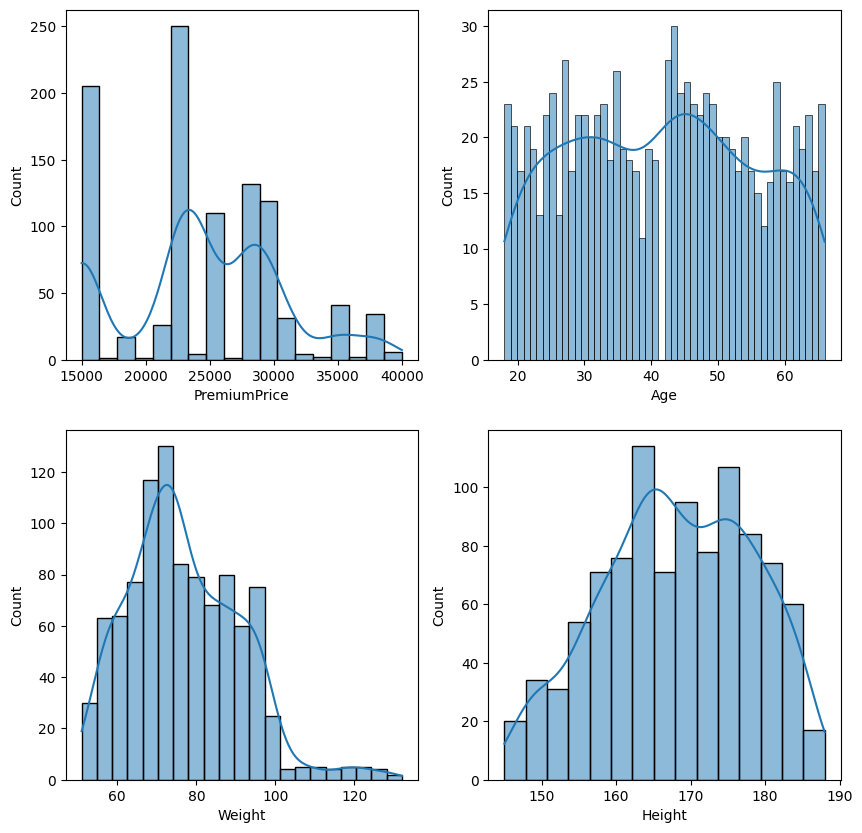

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.histplot(df['PremiumPrice'],kde = True)

plt.subplot(2,2,2)
sns.histplot(df['Age'],kde = True,bins = 50)

plt.subplot(2,2,3)
sns.histplot(df['Weight'],kde = True)

plt.subplot(2,2,4)
sns.histplot(df['Height'],kde = True)

Insights

*   Premium price histogram is almost forming a normal distribution and we can observe only few outliers at the right tail end.
*   Weight column also have outlier at the right tail end.





## Box plot


In [ ]:
df.groupby('Diabetes')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,572.0,23931.818182,6562.956719,15000.0,19000.0,23000.0,29000.0,39000.0
1,414.0,24896.135266,5746.150162,15000.0,23000.0,25000.0,28000.0,40000.0


/tmp/ipython-input-148804573.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes',y='PremiumPrice',data = df,palette='Set2')


<Axes: xlabel='Diabetes', ylabel='PremiumPrice'>

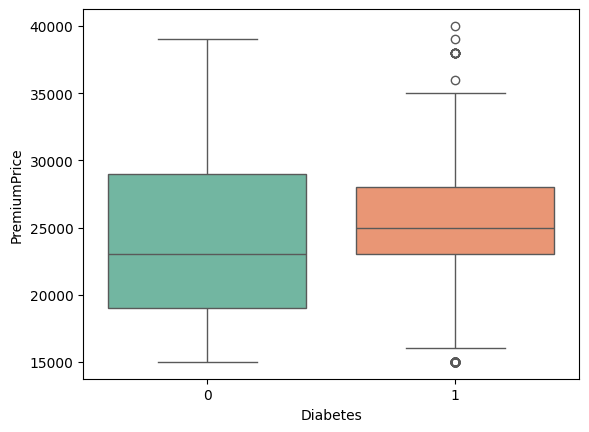

In [ ]:
sns.boxplot(x='Diabetes',y='PremiumPrice',data = df,palette='Set2')

In [ ]:
df.groupby('BloodPressureProblems')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
BloodPressureProblems,,,,,,,,
0,524.0,23356.870229,6605.847295,15000.0,15000.0,23000.0,28000.0,39000.0
1,462.0,25448.051948,5619.584064,15000.0,23000.0,25000.0,28000.0,40000.0


/tmp/ipython-input-1872067406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BloodPressureProblems',y='PremiumPrice',data = df,palette='Set2' )


<Axes: xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

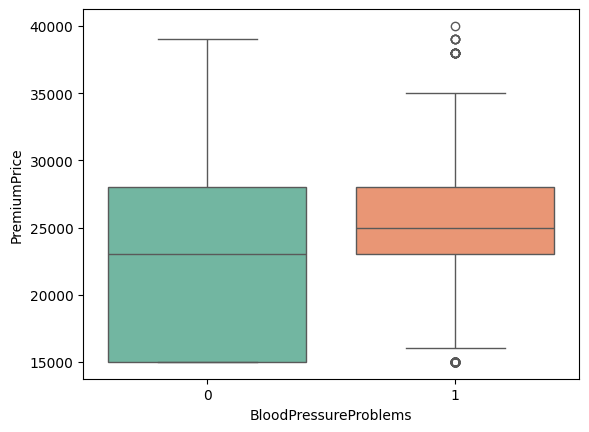

In [ ]:
sns.boxplot(x='BloodPressureProblems',y='PremiumPrice',data = df,palette='Set2' )

In [ ]:
df.groupby('AnyTransplants')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
AnyTransplants,,,,,,,,
0,931.0,23897.959184,5741.502007,15000.0,21000.0,23000.0,28000.0,40000.0
1,55.0,31763.636364,9213.443552,15000.0,28000.0,38000.0,38000.0,38000.0


/tmp/ipython-input-1846313892.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AnyTransplants',y='PremiumPrice',data = df,palette='Set2')


<Axes: xlabel='AnyTransplants', ylabel='PremiumPrice'>

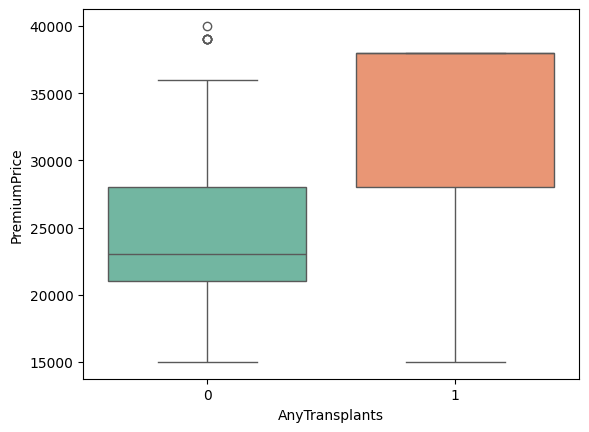

In [ ]:
sns.boxplot(x='AnyTransplants',y='PremiumPrice',data = df,palette='Set2')

In [ ]:
df.groupby('AnyChronicDiseases')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
AnyChronicDiseases,,,,,,,,
0,808.0,23725.247525,6322.106231,15000.0,15750.0,23000.0,28000.0,39000.0
1,178.0,27112.359551,5056.602111,18000.0,23000.0,28000.0,30000.0,40000.0


/tmp/ipython-input-1769621678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AnyChronicDiseases',y='PremiumPrice',data = df,palette='Set2')


<Axes: xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

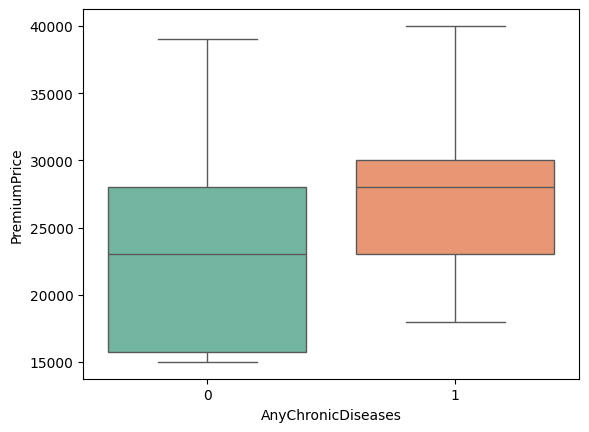

In [ ]:
sns.boxplot(x='AnyChronicDiseases',y='PremiumPrice',data = df,palette='Set2')

In [ ]:
df.groupby('KnownAllergies')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
KnownAllergies,,,,,,,,
0,774.0,24297.157623,6165.636707,15000.0,21000.0,23000.0,28000.0,40000.0
1,212.0,24481.132075,6553.796529,15000.0,21000.0,23000.0,29000.0,39000.0


/tmp/ipython-input-1416227417.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KnownAllergies',y='PremiumPrice',data = df,palette='Set2' )


<Axes: xlabel='KnownAllergies', ylabel='PremiumPrice'>

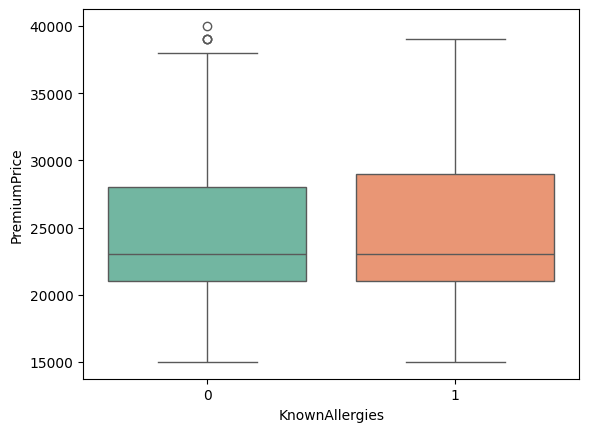

In [ ]:
sns.boxplot(x='KnownAllergies',y='PremiumPrice',data = df,palette='Set2' )

In [ ]:
df.groupby('HistoryOfCancerInFamily')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
HistoryOfCancerInFamily,,,,,,,,
0,870.0,24147.126437,6117.864935,15000.0,21500.0,23000.0,28000.0,40000.0
1,116.0,25758.620690,7017.519306,15000.0,21000.0,28000.0,31000.0,39000.0


/tmp/ipython-input-1429266785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HistoryOfCancerInFamily',y='PremiumPrice',data = df,palette='Set2' )


<Axes: xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

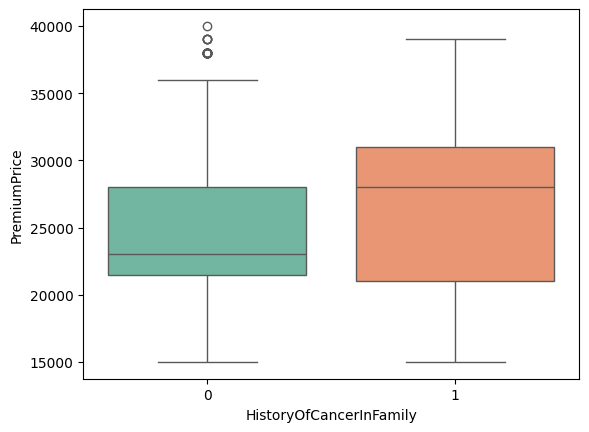

In [ ]:
sns.boxplot(x='HistoryOfCancerInFamily',y='PremiumPrice',data = df,palette='Set2' )

In [ ]:
df.groupby('NumberOfMajorSurgeries')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
NumberOfMajorSurgeries,,,,,,,,
0,479.0,22968.684760,6356.976577,15000.0,15000.0,23000.0,25000.0,39000.0
1,372.0,24741.935484,6593.966409,15000.0,21000.0,25000.0,29250.0,39000.0
2,119.0,28084.033613,1175.886481,24000.0,28000.0,28000.0,28000.0,40000.0
3,16.0,28000.000000,0.000000,28000.0,28000.0,28000.0,28000.0,28000.0


/tmp/ipython-input-357094487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NumberOfMajorSurgeries',y='PremiumPrice',data = df,palette='Set2' )


<Axes: xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

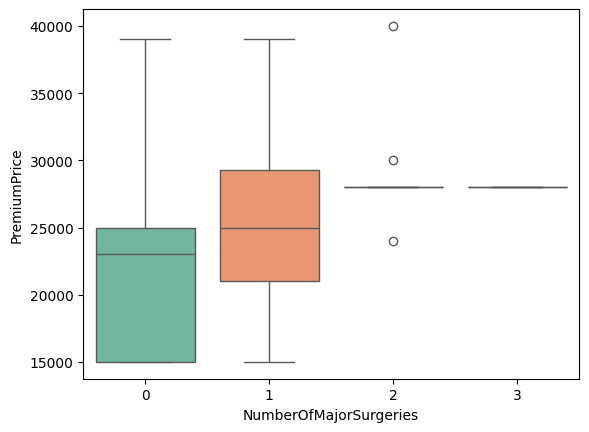

In [ ]:
sns.boxplot(x='NumberOfMajorSurgeries',y='PremiumPrice',data = df,palette='Set2' )

Insights

*   Person with diabetes have some outliers, we will further investigate this whether this data points are genuine or real outliers or can we spot any error.
*   Person with no diabetes have higher variance of premium price compare to diabetic person.

*   Statiscal mean of diabetic or non diabetic person seems to almost same, although we will further investigate this claim by doing hypothesis testing.

*   Mean of person with chronic disease and non chronic disease seems to be different and also for transplant and non transplant and major surgeries in the past columns.
*   Distribution for transplant person is at higher end of premium price which needs to be investigated and also number of person are also very less compare to non transplant person.

*   Person with allergy and non allergy have same distribution in premium price.

*   25% of data lies at 1500 premium price or below for Person with no BP issues.





## Feature Engineering

In [ ]:
df['BMI'] = df['Weight']/(df['Height']/100)**2

In [ ]:
df.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


/tmp/ipython-input-1387196370.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['BMI'],palette='Set2')


<Axes: ylabel='BMI'>

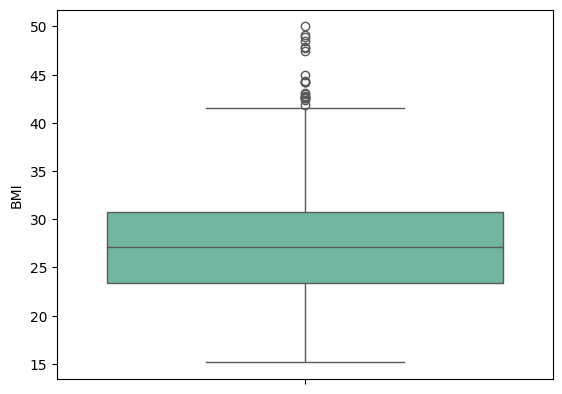

In [ ]:
sns.boxplot(df['BMI'],palette='Set2')

In [ ]:
df['Age'].min(),df['Age'].max()

(18, 66)

In [ ]:
bins = [-float('inf'),18,30,45,60,float('inf')]
labels = ["Under 18", "18-30", "31-45", "46-60", "Above 60"]
df['AgeBin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeBin
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,31-45
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,46-60
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,31-45
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,46-60
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,Under 18
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,Above 60
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,46-60
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,46-60


In [ ]:
bins = [-float('inf'),18.5,24.9,29.9,60]
labels = ["Under_weight", "Normal_weight", "Over_weight", "Obese"]
df['BMIbin'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True)

df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeBin,BMIbin
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,31-45,Normal_weight
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,46-60,Normal_weight
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,31-45,Normal_weight
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,46-60,Over_weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,31-45,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,Under 18,Normal_weight
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,Above 60,Obese
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,46-60,Over_weight
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,46-60,Over_weight


In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeBin,BMIbin
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,31-45,Normal_weight
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,46-60,Normal_weight
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,31-45,Normal_weight
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,46-60,Over_weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,31-45,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,Under 18,Normal_weight
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,Above 60,Obese
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,46-60,Over_weight
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,46-60,Over_weight


## Corelation


In [ ]:
import pandas as pd

cols = ['Age','Height','Weight','NumberOfMajorSurgeries','PremiumPrice','BMI']
corr_matrix = df[cols].corr()
corr_long = corr_matrix.stack().reset_index()
corr_long.columns = ['Variable1','Variable2','Correlation']

corr_long.to_csv("correlation_matrix.csv", index=False)


In [ ]:
corr_matrix

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice,BMI
Age,1.000000,0.039879,-0.018590,0.429181,0.697540,-0.042027
Height,0.039879,1.000000,0.066946,0.037289,0.026910,-0.504947
Weight,-0.018590,0.066946,1.000000,-0.006108,0.141507,0.820679
NumberOfMajorSurgeries,0.429181,0.037289,-0.006108,1.000000,0.264250,-0.027225
PremiumPrice,0.697540,0.026910,0.141507,0.264250,1.000000,0.103812
BMI,-0.042027,-0.504947,0.820679,-0.027225,0.103812,1.000000


<Axes: >

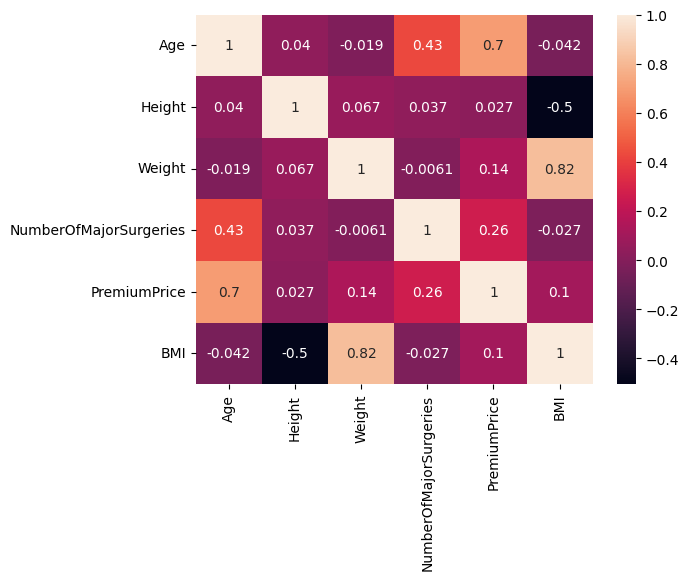

In [ ]:
sns.heatmap(corr_matrix,annot = True)

Insights

*   Premium price is highly corelated with age and little corelated with number of major surgeries column.

*   Corelation of BMI and Premium price is also not high.

## Check for Outliers and Treatment if required

### IQR Method

In [ ]:
# here we are taking column like BMI and Premium prices to check the outlierss

In [ ]:
df_out= df[['BMI','PremiumPrice']]
Q1 = df_out.quantile(.25)
Q3 = df_out.quantile(.75)
IQR = Q3 - Q1
IQR

,0
BMI,7.366478
PremiumPrice,7000.000000


In [ ]:
print('Q1:' ,Q1)
print('Q3:' ,Q3)


Q1: BMI                23.393392
PremiumPrice    21000.000000
Name: 0.25, dtype: float64
Q3: BMI                30.75987
PremiumPrice    28000.00000
Name: 0.75, dtype: float64


In [ ]:
((df_out < (Q1 - 1.5*IQR)) | (df_out> (Q3 + 1.5 * IQR))).any().sum()

np.int64(2)

Insights:

*   There is 1 data point which is outlier and treatment of them by deleting is not right because dataset has only 968 datapoints.



## Missing values


In [ ]:
df.isna().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


There are no missing values in the dataset


## Hypothesis Testing

We will now validated various statistical test to validate whether any health condition significantly affecting insurance premium price

In [ ]:
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import chi2_contingency

---


### Q-> 1  Is the insurance premium for a person with chronic disease different than person with no chronic disease?
---



*   H0 is null hypothesis
*   Ha is alternate hypothesis



H0:  Chronic disease doesn't affects  premiums price.

Ha: Chronic disease affects  premiums price


In [ ]:
df.groupby(['AnyChronicDiseases'])['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
AnyChronicDiseases,,,,,,,,
0,808.0,23725.247525,6322.106231,15000.0,15750.0,23000.0,28000.0,39000.0
1,178.0,27112.359551,5056.602111,18000.0,23000.0,28000.0,30000.0,40000.0


In [ ]:
def result(p_value,alpha):
  if p_value > alpha:
    print('Accept Null Hypothesis')
  else:
    print('Reject Null Hypothesis')

In [ ]:
No_chronic = df[df['AnyChronicDiseases'] ==  0]['PremiumPrice'].sample(150)
Yes_chronic = df[df['AnyChronicDiseases'] == 1]['PremiumPrice'].sample(150)

This is an example of two sample Ttest as population mean and deviation is unknown. Before applying Ttest we have to check Ttest assumptions through levene test which says both the group should have same variance.

To check whether for both the group variance is different or not , we will do Levene test

We will test the null hypothesis

>$H_0$: All the group have same variances.

against the alternative hypothesis

>$H_a$: At least one group have different variance from the rest

In [ ]:
stat, p_value = levene(Yes_chronic, No_chronic)
print(result(p_value,.05),'The p-value is : ', p_value,)

Reject Null Hypothesis
None The p-value is :  0.0242889794621421


Observation: This means variance are same and hence we will go for T test

### **T test**



*   Ho is null hypothesis
*   Ha is alternate hypothesis



H0:  Chronic disease doesn't affects  premiums price.

Ha: Chronic disease affects  premiums price


In [ ]:
t_statistic, p_value = stats.ttest_ind(Yes_chronic , No_chronic )

print(f"t-statistic: {t_statistic}")
print(result(p_value,.05),p_value)


t-statistic: 5.664177383187075
Reject Null Hypothesis
None 3.479292793697238e-08


Observation: This shows individual who has chronic disease ahave higher average insurance premiums.

---


### Q-> 2 Are the insurance premiums higher for a person who have a chronic disease?
---

H0:  Person with Chronic disease have the same insurance premiums compare to person with no chornic disease.

Ha: Person with Chronic disease have higher premiums price compare to person with no chronic disease.


In [ ]:
t_statistic, p_value = stats.ttest_ind(Yes_chronic , No_chronic ,alternative = 'greater')

print(f" t-statistic: {t_statistic}")
result(p_value,.05)
print(f"p_value : {p_value}")


 t-statistic: 5.664177383187075
Reject Null Hypothesis
p_value : 1.739646396848619e-08


Observation: Person with chronic disease have higher insurance premium price.

---


### Q-> 3  Are the insurance premiums higher for a person who had a transplant?
---

In [ ]:
df.groupby(['AnyTransplants'])['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
AnyTransplants,,,,,,,,
0,931.0,23897.959184,5741.502007,15000.0,21000.0,23000.0,28000.0,40000.0
1,55.0,31763.636364,9213.443552,15000.0,28000.0,38000.0,38000.0,38000.0


In [ ]:
Transplant = df[df['AnyTransplants'] == 1]['PremiumPrice'].sample(50)
No_Transplant = df[df['AnyTransplants'] == 0]['PremiumPrice'].sample(50)

We will check variance of both the group using levene test before applying ttest or welch T test.

In [ ]:
stat, p_value = levene(Transplant, No_Transplant)
print(result(p_value,.05),'The p-value is : ', p_value,)

Accept Null Hypothesis
None The p-value is :  0.08797372005446405


Observation: Both the group have same variance and hence we will go for t test.

Ho:  Insurance premiums are same for both the group (Transplant or Non Transplant)

Ha: Person with transplant have higher insurance premiums price


In [ ]:
t_statistic, p_value = stats.ttest_ind(Transplant ,No_Transplant,alternative = 'greater')

print(f" t-statistic: {t_statistic}")
result(p_value,.05)
print(f"p_value : {p_value}")


 t-statistic: 5.378143244461563
Reject Null Hypothesis
p_value : 2.558789861926363e-07


Observation: Person who had transplant  have higher insurance premium price.

---


### Q-> 4 Are the insurance premiums higher for a person who are diabetic ?
---

In [ ]:
df.groupby(['Diabetes'])['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,572.0,23931.818182,6562.956719,15000.0,19000.0,23000.0,29000.0,39000.0
1,414.0,24896.135266,5746.150162,15000.0,23000.0,25000.0,28000.0,40000.0


In [ ]:
Diabetes = df[df['Diabetes'] == 1]['PremiumPrice'].sample(400)
No_diabetic = df[df['Diabetes'] == 0]['PremiumPrice'].sample(400)

In [ ]:
stat, p_value = levene(Diabetes, No_diabetic)
print(result(p_value,.05),'The p-value is : ', p_value,)

Reject Null Hypothesis
None The p-value is :  0.004105345915457271


Observation: Variance of both the group are not same and hence we will go for Welch T test

### **Welch test**

Ho:  Insurance premiums are same for both the group (Diabetic or Non Diabetic)

Ha: Person with diabetes have higher insurance premiums price


In [ ]:
t_statistic, p_value = stats.ttest_ind(Diabetes ,No_diabetic,equal_var=False,alternative = 'greater')

print(f"t-statistic: {t_statistic}")
result(p_value,.05)
print(f"p_value : {p_value}")


t-statistic: 1.1752309531689207
Accept Null Hypothesis
p_value : 0.12013001667500789


Observation: We dont have significant statistical evidence that person who are diabetic have higher insurance premiums.

---


### Q-> 5 Are insurance premiums higher for a person who had cancer in the past?
---

In [ ]:
df.groupby(['HistoryOfCancerInFamily'])['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
HistoryOfCancerInFamily,,,,,,,,
0,870.0,24147.126437,6117.864935,15000.0,21500.0,23000.0,28000.0,40000.0
1,116.0,25758.620690,7017.519306,15000.0,21000.0,28000.0,31000.0,39000.0


In [ ]:
Yes_cancer = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice'].sample(100)
No_cancer = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice'].sample(100)

In [ ]:
stat, p_value = levene(Yes_cancer, No_cancer)
print(result(p_value,.05),'The p-value is : ', p_value,)

Accept Null Hypothesis
None The p-value is :  0.3153893627136819


Observation: Variance of both the group are same and hence we will go for T test

Ho:  Insurance premiums are same for both the group (Yes_cancer,No_cancer)

Ha: Individuals with a family history of cancer have higher insurance premiums price


In [ ]:
t_statistic, p_value = stats.ttest_ind(Yes_cancer ,No_cancer,alternative = 'greater')

print(f" t-statistic: {t_statistic}")
result(p_value,.05)
print(f"p_value : {p_value}")


 t-statistic: 0.8185133773308216
Accept Null Hypothesis
p_value : 0.20702405407576702


Observation: We have significant statistical evidence that individuals with a family history of cancer have higher insurance premiums.

---


### Q-> 6 Are insurance premiums higher for a person who has BP ?
---

In [ ]:
df.groupby(['BloodPressureProblems'])['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
BloodPressureProblems,,,,,,,,
0,524.0,23356.870229,6605.847295,15000.0,15000.0,23000.0,28000.0,39000.0
1,462.0,25448.051948,5619.584064,15000.0,23000.0,25000.0,28000.0,40000.0


In [ ]:
Bp= df[df['BloodPressureProblems'] == 1]['PremiumPrice'].sample(400)
No_bp = df[df['BloodPressureProblems'] == 0]['PremiumPrice'].sample(400)

In [ ]:
stat, p_value = levene(Bp, No_bp)
print(result(p_value,.05),'The p-value is : ', p_value)

Reject Null Hypothesis
None The p-value is :  0.003382607419582078


Observation: Both the group doesn't have same variance and hence we will go for welch t test

Ho:  Insurance premiums are same for both the group (BP or No_bp)

Ha: Person with BP have higher insurance premiums price


In [ ]:
t_statistic, p_value = stats.ttest_ind(Bp ,No_bp,equal_var=False,alternative = 'greater')

print(f"t-statistic: {t_statistic}")
result(p_value,.05)
print(f"p_value : {p_value}")


t-statistic: 5.016910520489582
Reject Null Hypothesis
p_value : 3.255382431114599e-07


Observation: We have significant statistical evidence that individuals with a BP have higher insurance premiums.

---


### Q-> 7 Are the insurance premiums different across age group?
---

Ho:  Insurance premiums price not  impacted by age group

Ha: Insurance premiums price are  impacted by age group


In [ ]:
df.groupby(['AgeBin'])['PremiumPrice'].describe()

/tmp/ipython-input-781977241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeBin'])['PremiumPrice'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeBin,,,,,,,,
Under 18,23.0,15956.521739,3169.144721,15000.0,15000.0,15000.0,15000.0,26000.0
18-30,238.0,17163.865546,4995.613791,15000.0,15000.0,15000.0,15000.0,39000.0
31-45,317.0,25031.545741,4332.568940,17000.0,23000.0,23000.0,25000.0,38000.0
46-60,290.0,28244.827586,3787.439285,16000.0,25000.0,28000.0,29000.0,39000.0
Above 60,118.0,28966.101695,3294.471420,24000.0,28000.0,28000.0,29000.0,40000.0


In [ ]:
age18_30 = df[df['AgeBin'] == '18-30']['PremiumPrice'].sample(100)
age31_45 = df[df['AgeBin'] == '31-45']['PremiumPrice'].sample(100)
age46_60 = df[df['AgeBin'] == '46-60']['PremiumPrice'].sample(100)
ageabove_60 =  df[df['AgeBin'] == 'Above 60']['PremiumPrice'].sample(100)

This is a problem, concerning three independent population means. One-way
ANOVA could be the appropriate test here provided normality and equality of
variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the
associated p-value to be valid.


*   The samples are independent.
*   Each sample is from a normally distributed population.
*   The population variance of the groups are all equal.


Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

H0:  Insurance Premiums follows normal distribution

Ha: Insurance Premiums does not follows normal distribution


In [ ]:
#Assumptions 1

test, p_value = shapiro(df['PremiumPrice'].sample(700))
print(result(p_value,.05),'The p-value is : ', p_value,)


Reject Null Hypothesis
None The p-value is :  2.3370269957031747e-18


Observation:We reject null hypothesis that means data is not normal.




In [ ]:
df['PremiumPrice'].skew()

np.float64(0.09763944413484053)

In [ ]:
df['PremiumPrice'].kurt()

np.float64(-0.4528945772861501)

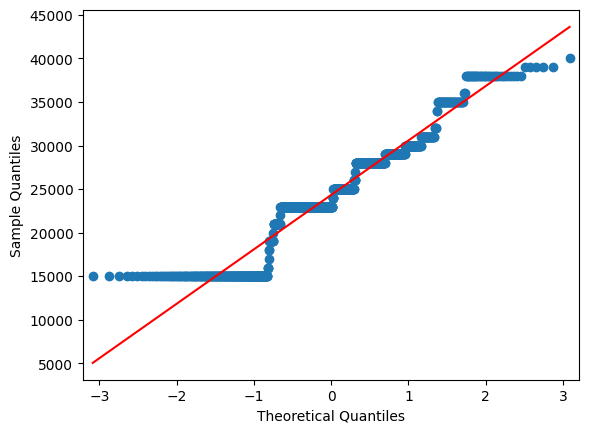

In [ ]:
## qq plot for visualisation
from statsmodels.graphics.gofplots import qqplot
qqplot(df['PremiumPrice'],line ="s")
plt.show()

Observations:

*   QQ plot also says distribution is not normal
*   Histogram of Premiums column shown before was also not normal.








In [ ]:
#Assumption 2: Homogeneity of Variance
# levene test
stat, p_value = levene(age18_30, age31_45 , age46_60,ageabove_60 )
print(result(p_value,.05),'The p-value is : ', p_value,)

Accept Null Hypothesis
None The p-value is :  0.29208765301829787


Observation: This means variance are same and hence we will go for Anova test

#### Anova test

In [ ]:
f_stats, p_value  = f_oneway(age18_30,age31_45 ,age46_60,ageabove_60)
print(result(p_value,.05),'The p-value is : ', p_value,)

Reject Null Hypothesis
None The p-value is :  5.755437224015029e-78


Observation: Since the p-value is lesser than the 5% significance level for both Anova and kruskal wallis test, we will reject the null hypothesis. Hence, we have enough statistical evidence to say that age affects insurance premiums.

---

### Q-> 6 Are the insurance premiums different across BMI groups?
---

In [ ]:
df.groupby(['BMIbin'])['PremiumPrice'].describe()

/tmp/ipython-input-996634682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['BMIbin'])['PremiumPrice'].describe()


,count,mean,std,min,25%,50%,75%,max
BMIbin,,,,,,,,
Under_weight,39.0,22666.666667,5027.991821,15000.0,21000.0,23000.0,25000.0,35000.0
Normal_weight,315.0,23755.555556,5612.252797,15000.0,21000.0,25000.0,28000.0,39000.0
Over_weight,321.0,24236.760125,6194.252939,15000.0,23000.0,23000.0,28000.0,39000.0
Obese,311.0,25237.942122,6922.239122,15000.0,23000.0,25000.0,30000.0,40000.0


In [ ]:
normal_weight = df[df['BMIbin'] == 'Normal_weight']['PremiumPrice'].sample(300)
over_weight = df[df['BMIbin'] == 'Over_weight']['PremiumPrice'].sample(300)
obese = df[df['BMIbin'] == 'Obese']['PremiumPrice'].sample(300)
stat, p_value = levene(normal_weight, over_weight, obese)
print(result(p_value,.05),'The p-value is : ', p_value,)

Reject Null Hypothesis
None The p-value is :  2.0518172006795884e-05


Observation: This means variance are not same and hence we will go for Kruskal wallis test

#### Kruskal WaLLis Test

In [ ]:
from scipy.stats import kruskal
stat, p_value = kruskal(normal_weight,over_weight,obese)
result(p_value,.05),'The p-value is : ', p_value,

Reject Null Hypothesis


(None, 'The p-value is : ', np.float64(0.013791362941024354))

In [ ]:
f_stats, p_value  = f_oneway(normal_weight,over_weight ,obese)
print(result(p_value,.05),'The p-value is : ', p_value,)

Reject Null Hypothesis
None The p-value is :  0.008598100994540548


Observation: Since the p-value is lesser than the 5% significance level for both Anova and kruskal wallis test, we will reject the null hypothesis. Hence, we have enough statistical evidence to say that the insurance premiums are affected by BMI groups.

---

### Q-> 6 Do insurance premiums vary based on the number of major surgeries an individual has undergone?
---

Ho:  Insurance premiums price not  impacted by number of major surgeries

Ha: Insurance premiums price impacted by number of major surgeries


In [ ]:
df.groupby(['NumberOfMajorSurgeries'])['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
NumberOfMajorSurgeries,,,,,,,,
0,479.0,22968.684760,6356.976577,15000.0,15000.0,23000.0,25000.0,39000.0
1,372.0,24741.935484,6593.966409,15000.0,21000.0,25000.0,29250.0,39000.0
2,119.0,28084.033613,1175.886481,24000.0,28000.0,28000.0,28000.0,40000.0
3,16.0,28000.000000,0.000000,28000.0,28000.0,28000.0,28000.0,28000.0


In [ ]:
surgery_0 = df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice'].sample(100)
surgery_1 = df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice'].sample(100)
surgery_2 = df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice'].sample(100)
stat, p_value = levene(surgery_0 , surgery_1, surgery_2)
print(result(p_value,.05),'The p-value is : ', p_value,)

Reject Null Hypothesis
None The p-value is :  1.2164590597500101e-24


Observation: This means variance are not same and hence we will go for Kruskal wallis test

In [ ]:
from scipy.stats import kruskal
stat, p_value = kruskal(surgery_0,surgery_1,surgery_2)
result(p_value,.05),'The p-value is : ', p_value,

Reject Null Hypothesis


(None, 'The p-value is : ', np.float64(6.9797291252308615e-09))

In [ ]:
f_stats, p_value  = f_oneway(surgery_0,surgery_1 ,surgery_2)
print(result(p_value,.05),'The p-value is : ', p_value,)

Reject Null Hypothesis
None The p-value is :  7.830811809907225e-10


Observation: Since the p-value is lesser than the 5% significance level for both Anova and kruskal wallis test, we will reject the null hypothesis. Hence, we have enough statistical evidence to say that the insurance premiums are affected by number of major surgeries

---

### Q-> 6 Is there an interaction effect between BMI and age on insurance premium?
---

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#perform two-way ANOVA
# fit an ols model on the dataframe
# use 'fit()' to fit the linear model
# ols('dependent variable ~ C(independent variable1) * (independent variable2)',
# ~ : This symbol separates the dependent variable from the independent variables
# C(): This indicates that the variable following it is treated as a categorical
# the + sign is used to include independent variables without an interaction
# the * sign is used to include independent variables with an interaction

In [ ]:
test = ols('PremiumPrice ~ C(BMIbin) * C(AgeBin)', data=df).fit()
# create a table for a 2-way ANOVA test
# Pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_table = sm.stats.anova_lm(test, typ = 2)
# Display the results
print(anova_table)

                           sum_sq     df           F         PR(>F)
C(BMIbin)            6.592183e+08    3.0   12.805435   3.283921e-08
C(AgeBin)            2.153591e+10    4.0  313.754186  5.485974e-173
C(BMIbin):C(AgeBin)  5.780410e+08   12.0    2.807138   8.743757e-04
Residual             1.659358e+10  967.0         NaN            NaN


Observations :


*   PremiumPrice varies significantly by Age category.
*   PremiumPrice varies significantly by BMI category.
*   There is a significant interaction between BMI and Age categories, meaning the impact of BMI on PremiumPrice changes across Age groups.

In [ ]:
test2 = ols('PremiumPrice ~ C(Diabetes) * C(AgeBin)', data=df).fit()
# Pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_table2 = sm.stats.anova_lm(test, typ = 2)
# Display the results
print(anova_table2)

                           sum_sq     df           F         PR(>F)
C(BMIbin)            6.592183e+08    3.0   12.805435   3.283921e-08
C(AgeBin)            2.153591e+10    4.0  313.754186  5.485974e-173
C(BMIbin):C(AgeBin)  5.780410e+08   12.0    2.807138   8.743757e-04
Residual             1.659358e+10  967.0         NaN            NaN


## Scatter plot

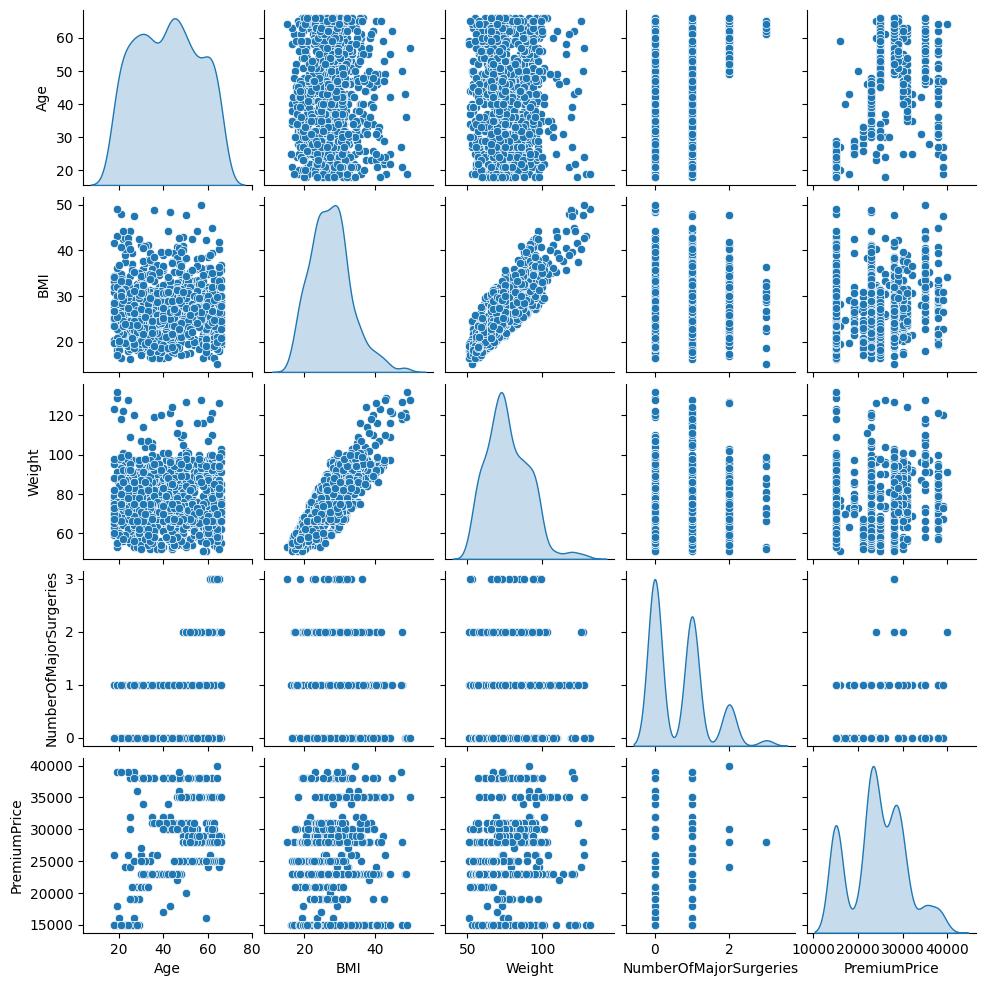

In [ ]:
sns.pairplot(df[['Age', 'BMI','Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']],diag_kind = 'kde',height=2)
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

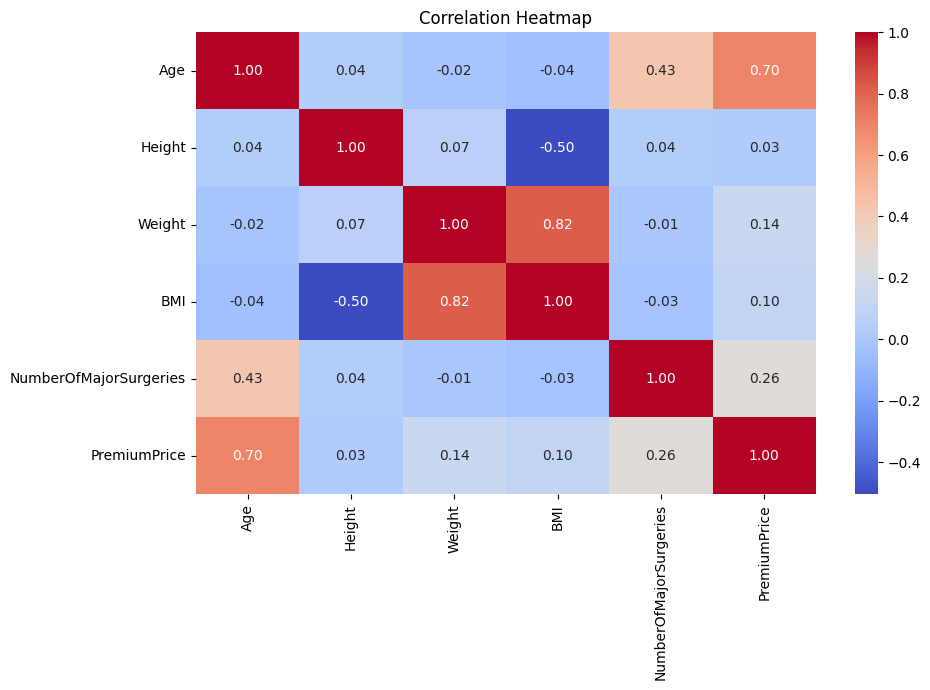

In [ ]:
plt.figure(figsize=(10, 6))
corr = df[['Age', 'Height', 'Weight', 'BMI', 'NumberOfMajorSurgeries', 'PremiumPrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

## ML model

## Model - 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [ ]:
df.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeBin,BMIbin
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,31-45,Normal_weight
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,46-60,Normal_weight
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,31-45,Normal_weight
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,46-60,Over_weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,31-45,Obese


In [ ]:
df_1 = df.copy()

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    int64   
 8   HistoryOfCancerInFamily  986 non-null    int64   
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  BMI                      986 non-null    float64 
 12  AgeBin                   986 non-null    category
 13  BMIbin                   986 non-null    category
dtypes: categor

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
df_1.isna().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X= df_1.drop('PremiumPrice',axis =1)
y= df_1['PremiumPrice']
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
762,19,0,0,0,0,146,55,0,0,0,25.802214,18-30,Over_weight
334,31,0,1,0,0,162,87,0,0,0,33.150434,31-45,Obese
890,58,1,0,0,0,147,75,0,0,0,34.707761,46-60,Obese
529,31,0,1,0,0,171,85,0,0,0,29.068773,31-45,Over_weight
468,26,1,1,0,0,167,70,0,1,1,25.099502,18-30,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,0,24.141519,46-60,Normal_weight
270,46,0,1,0,1,166,58,0,0,1,21.048048,46-60,Normal_weight
860,61,1,0,0,0,161,66,0,0,3,25.461981,Above 60,Over_weight
435,37,1,0,0,0,174,63,1,1,1,20.808561,31-45,Normal_weight


In [ ]:
y_train

,PremiumPrice
762,15000
334,34000
890,29000
529,23000
468,15000
...,...
106,25000
270,25000
860,28000
435,31000


In [ ]:
preproccesor=ColumnTransformer(transformers = [('cat',ce.TargetEncoder(),categorical_cols),
                                  ('num',StandardScaler(),numeric_cols)])

In [ ]:
model = Pipeline(steps=[('preprocess',preproccesor),
                        ('regressor',LinearRegression())])

In [ ]:
kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
scores = cross_val_score(model,X,y,cv=kf)
print(scores)
print("Average R2:",scores.mean())


[0.77490795 0.67230765 0.63424132 0.5088892  0.75592981]
Average R2: 0.6692551889112052


In [ ]:
kf = KFold(n_splits = 5,shuffle = True, random_state = 42)
rmse_scores = cross_val_score(model,X,y,cv=kf,scoring ='neg_root_mean_squared_error')
rmse_scores = -rmse_scores
print(rmse_scores )
print("Average rmse_scores :",rmse_scores.mean())


[3098.15318819 3888.34255143 3594.11919638 4103.98121069 2943.24585038]
Average rmse_scores : 3525.5683994140572


In [ ]:
kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
mape_scores = cross_val_score(model,X,y,cv=kf,scoring ='neg_mean_absolute_percentage_error')
mape_scores = -mape_scores
print(mape_scores )
print("Average mape_scores :",mape_scores.mean())

[0.09232909 0.09081374 0.10467433 0.10751634 0.09250228]
Average mape_scores : 0.09756715553416531


In [ ]:
model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', TargetEncoder(),
                                                  Index(['AgeBin', 'BMIbin'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
#Hyper parameter tuning

In [ ]:
Hyper_par = [{'regressor':[LinearRegression()]},
               {'regressor' : [Lasso()],
                'regressor__alpha':[.01,.1,.5,.7,1,2,5,10]},
               {'regressor': [Ridge()],
                'regressor__alpha':[.01,.1,.5,.7,1,2,5,10]}]


In [ ]:
scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mape': 'neg_mean_absolute_percentage_error'
}


In [ ]:
model_pipeline = Pipeline(steps=[('preprocess',preproccesor),
                        ('regressor',None)])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_1 = GridSearchCV(estimator = model_pipeline ,param_grid = Hyper_par,
             cv=5,scoring =scoring,refit ='rmse',n_jobs =-1)
model_1 = grid_1.fit(X_train,y_train)

In [ ]:
print("Best Parameters:", model_1.best_params_)
print("Best rmse :", model_1.best_score_)

Best Parameters: {'regressor': Lasso(), 'regressor__alpha': 10}
Best rmse : -3653.519234426955


In [ ]:
best_model_1 = model_1.best_estimator_
feature_names_1 = best_model_1.named_steps['preprocess'].get_feature_names_out()
coefficients_1 = best_model_1.named_steps['regressor'].coef_
coef_df_1 = pd.DataFrame({
    'Feature': feature_names_1,
    'Coefficient': coefficients_1
})

display(coef_df_1)

,Feature,Coefficient
0,cat__AgeBin,0.702131
1,cat__BMIbin,1.376933
2,num__Age,1758.919875
3,num__Diabetes,-158.783324
4,num__BloodPressureProblems,86.714047
5,num__AnyTransplants,1755.555428
6,num__AnyChronicDiseases,916.701137
7,num__Height,389.029840
8,num__Weight,392.951675
9,num__KnownAllergies,24.381286


### Analysis of Potentially Abnormal Coefficients

Upon examining the coefficients of the best model, several values appear counter-intuitive or suggest complexities within the linear model, especially when considering general expectations, previous exploratory analysis, and hypothesis testing. These abnormalities primarily point towards the effects of multicollinearity or limitations of the linear model in capturing nuanced relationships.

Here are the key observations:

1.  **`num__Diabetes` (-168.85)**
    *   **Abnormality:** This coefficient is **negative**. Generally, one would expect diabetes to increase insurance premiums due to associated health risks. Our earlier hypothesis testing (Q4) also suggested that individuals with diabetes tend to have higher premiums. A negative coefficient implies that, holding all other factors constant, diabetes *decreases* the premium.
    *   **Possible Explanation:** This might occur due to multicollinearity. The model could be attributing the positive impact of general health conditions (to which diabetes contributes) to other highly correlated features like `AnyChronicDiseases`, `Age`, or `BloodPressureProblems`. This might lead to a compensatory negative or near-zero coefficient for `Diabetes` when all are included simultaneously.

2.  **`num__NumberOfMajorSurgeries` (-378.51)**
    *   **Abnormality:** This coefficient is also **negative**. Intuitively, a history of major surgeries would typically imply higher health risks and thus potentially higher premiums. A negative value suggests that having more major surgeries leads to a *decrease* in premium, which is unexpected.
    *   **Possible Explanation:** Similar to diabetes, this could be influenced by multicollinearity or uncaptured complex interactions. It's plausible that individuals with a very high number of surgeries might already be in a specific risk category captured by other variables, or that the linear model struggles to isolate its unique effect.

3.  **`num__BMI` (-135.08) vs. `num__Height` (315.36) and `num__Weight` (531.03)**
    *   **Abnormality:** While `Height` and `Weight` have positive coefficients (suggesting higher values increase premiums), `BMI` itself carries a **negative** coefficient. This is contradictory, as BMI is derived from height and weight, and higher BMI is generally associated with higher health risks.
    *   **Possible Explanation:** This is a classic symptom of severe **multicollinearity** among `Height`, `Weight`, and `BMI` (as evidenced by their very high VIF scores). The model struggles to assign stable, unique coefficients to these highly inter-correlated variables. The positive coefficient for `cat__BMIbin` (1.35) further supports that higher BMI *categories* do tend to increase premiums, indicating the raw numerical `BMI`'s coefficient is unstable and less interpretable in this context.

In [ ]:
# compare all results
model_1.cv_results_
results_1 = pd.DataFrame(model_1.cv_results_)
results_1 = results_1[[
    'params',
    'mean_test_r2', 'rank_test_r2',
    'mean_test_rmse', 'rank_test_rmse',
    'mean_test_mape', 'rank_test_mape'
]]
results_1


,params,mean_test_r2,rank_test_r2,mean_test_rmse,rank_test_rmse,mean_test_mape,rank_test_mape
0,{'regressor': LinearRegression()},0.639991,17,-3655.586371,16,-0.102567,17
1,"{'regressor': Lasso(), 'regressor__alpha': 0.01}",0.639992,15,-3655.581621,14,-0.102566,16
2,"{'regressor': Lasso(), 'regressor__alpha': 0.1}",0.639999,14,-3655.546250,13,-0.102564,14
3,"{'regressor': Lasso(), 'regressor__alpha': 0.5}",0.640026,12,-3655.419345,11,-0.102551,12
4,"{'regressor': Lasso(), 'regressor__alpha': 0.7}",0.640042,9,-3655.338394,8,-0.102544,9
5,"{'regressor': Lasso(), 'regressor__alpha': 1}",0.640075,6,-3655.162619,4,-0.102529,7
6,"{'regressor': Lasso(), 'regressor__alpha': 2}",0.640140,3,-3654.817442,3,-0.102515,5
7,"{'regressor': Lasso(), 'regressor__alpha': 5}",0.640304,2,-3653.973290,2,-0.102457,3
8,"{'regressor': Lasso(), 'regressor__alpha': 10}",0.640403,1,-3653.519234,1,-0.102420,1
9,"{'regressor': Ridge(), 'regressor__alpha': 0.01}",0.639992,16,-3655.582084,15,-0.102566,15


### Linear Regression using Ordinary Least Squares OLS

In [ ]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
762,19,0,0,0,0,146,55,0,0,0,25.802214,18-30,Over_weight
334,31,0,1,0,0,162,87,0,0,0,33.150434,31-45,Obese
890,58,1,0,0,0,147,75,0,0,0,34.707761,46-60,Obese
529,31,0,1,0,0,171,85,0,0,0,29.068773,31-45,Over_weight
468,26,1,1,0,0,167,70,0,1,1,25.099502,18-30,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,0,24.141519,46-60,Normal_weight
270,46,0,1,0,1,166,58,0,0,1,21.048048,46-60,Normal_weight
860,61,1,0,0,0,161,66,0,0,3,25.461981,Above 60,Over_weight
435,37,1,0,0,0,174,63,1,1,1,20.808561,31-45,Normal_weight


In [ ]:
from category_encoders  import TargetEncoder
te =TargetEncoder()
X_train_te = te.fit_transform(X_train,y_train)
X_test_te = te.transform(X_test)
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_te)
X_test_scaled = scaler.transform(X_test_te)

In [ ]:
X_train_scaled

array([[-1.61753552, -0.85771955, -0.92891558, ..., -0.27968205,
        -1.58983788,  0.11512543],
       [-0.76394905, -0.85771955,  1.07652409, ...,  0.95617031,
         0.11254797,  1.20229072],
       [ 1.15662049,  1.16588226, -0.92891558, ...,  1.21808753,
         0.8969328 ,  1.20229072],
       ...,
       [ 1.37001711,  1.16588226, -0.92891558, ..., -0.33690388,
         0.99162635,  0.11512543],
       [-0.33715582,  1.16588226, -0.92891558, ..., -1.11953414,
         0.11254797, -1.00547632],
       [ 1.2277527 ,  1.16588226,  1.07652409, ...,  1.4249099 ,
         0.8969328 ,  1.20229072]])

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns = X_train_te.columns)

In [ ]:
X_train_scaled_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799,-0.279682,-1.589838,0.115125
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799,0.956170,0.112548,1.202291
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799,1.218088,0.896933,1.202291
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799,0.269701,0.112548,0.115125
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249,-0.397867,-1.589838,0.115125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1.298885,-0.857720,-0.928916,-0.243187,-0.470856,-1.320206,-1.311868,-0.524482,-0.359082,-0.874799,-0.558984,0.896933,-1.005476
784,0.303034,-0.857720,1.076524,-0.243187,2.123791,-0.221344,-1.311868,-0.524482,-0.359082,0.433249,-1.079256,0.896933,-1.005476
785,1.370017,1.165882,-0.928916,-0.243187,-0.470856,-0.720827,-0.759281,-0.524482,-0.359082,3.049346,-0.336904,0.991626,0.115125
786,-0.337156,1.165882,-0.928916,-0.243187,-0.470856,0.577828,-0.966501,1.906645,2.784880,0.433249,-1.119534,0.112548,-1.005476


In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_scaled_df)
# Reset the index of y_train to align with X_train_sm (which has a default integer index)
sm_model = sm.OLS(y_train.reset_index(drop=True), X_train_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     121.4
Date:                Thu, 08 Jan 2026   Prob (F-statistic):          1.13e-176
Time:                        03:54:28   Log-Likelihood:                -7557.4
No. Observations:                 788   AIC:                         1.514e+04
Df Residuals:                     774   BIC:                         1.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

**Observations** :


*   Age, transplants, chronic diseases, and family cancer history are the most powerful predictors of premium price because of low p value than .05
*   Diabetes, BP problems, and allergies do not show significant impact in this model because of high p value than .05  though they may still matter in other models or with interaction terms done with Hypothesis testing.


**Assumptions for normal distribution**


*   Residual(errors) should have normal distribution
*   No heteroscadesticity
*   No Multicollinearity
*   No Autocorelation

### Assumptions Check

In [ ]:
y_pred = model_1.predict(X_test)


In [ ]:
y_pred.shape

(198,)

In [ ]:
y_test

,PremiumPrice
613,31000
451,31000
731,29000
436,15000
275,23000
...,...
209,35000
506,29000
49,15000
717,28000


In [ ]:
errors2 = y_test- y_pred

Check for residual normal distribution (Histogram)

Text(0.5, 1.0, 'Histogram of Residual')

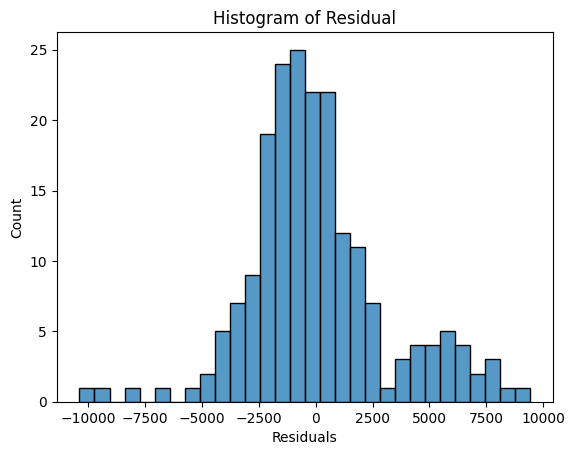

In [ ]:
sns.histplot(errors2,bins=30)
plt.xlabel("Residuals")
plt.title("Histogram of Residual")

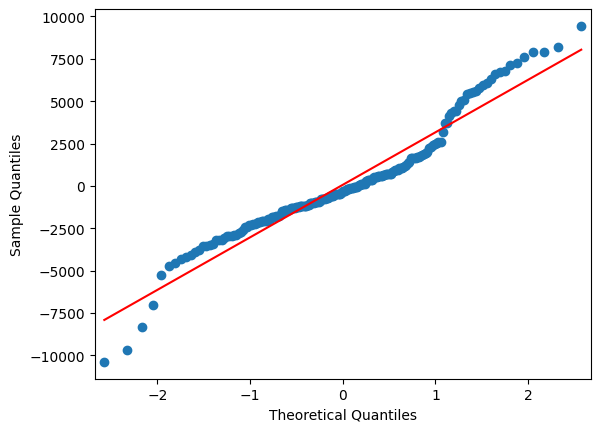

In [ ]:
## qq plot for visualisation
from statsmodels.graphics.gofplots import qqplot
qqplot(errors2,line ="s")
plt.show()

Observations:

*   QQ plot also says residual distribution is not normal
*   Histogram of Premiums column shown before was also not normal.








Shapiro test for Residual

In [ ]:
from scipy import stats

res = stats.shapiro(errors2)
res.statistic

np.float64(0.9445703903202396)

In [ ]:
print(res.pvalue)

6.555019065737815e-07


Observations :   
The 0.94 statistic itself suggests decent normality of residuals visually, but the associated p-value indicates that statistically, the assumption of perfect normality is violated, likely due to the sample size magnifying small deviations.

### Conclusion on QQ Plot and Residual Normality

Based on the visual interpretation of the QQ plot and supported by statistical tests:

*   **Visual Inspection:** The data points (residuals) in the QQ plot significantly deviate from the straight red line, especially at the tails. This visual evidence strongly suggests a departure from a normal distribution.

*   **Statistical Confirmation:**
    *   The **Shapiro-Wilk test** yielded a very low p-value (much less than 0.05). This leads us to **reject the null hypothesis** that the residuals are not normally distributed.
    *   Similarly, the **OLS Regression Summary**  indicated a `Prob(Omnibus): 0.000` and `Prob(JB): 0.00`, both of which are strong indicators of non-normal residuals.

**Overall, both visual analysis of the QQ plot and rigorous statistical tests conclude that the residuals of your model are NOT normally distributed.** While the Shapiro-Wilk test statistic (`res.statistic`) of 0.94 might seem close to 1, the extremely small p-value statistically confirms that this deviation from perfect normality is significant for your dataset size.

Check for homoscadedicty

Text(0.5, 1.0, 'Graph for homoscedasticity check')

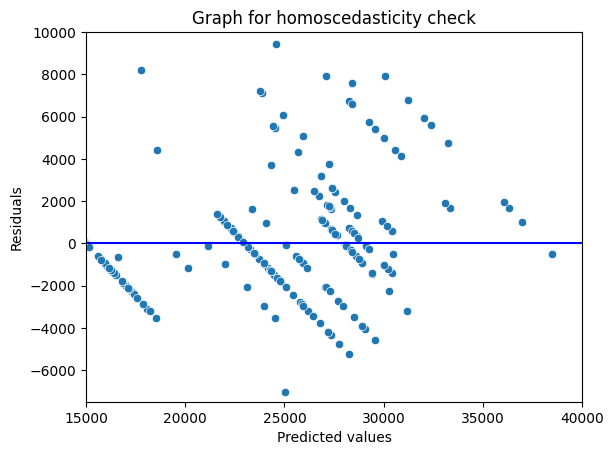

In [ ]:
sns.scatterplot(x= y_pred,y=errors2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-7500,10000)
p = sns.lineplot(x=[0,40000], y=[0,0], color='blue')
plt.xlim(15000,40000)
plt.title("Graph for homoscedasticity check")

In [ ]:
mean_residuals = np.mean(errors2)
mean_residuals

np.float64(63.85307111900446)

Text(0.5, 0.98, 'y_hat vs y_test')

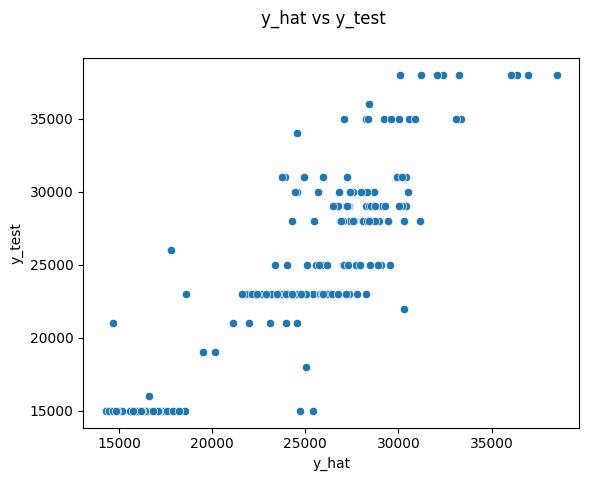

In [ ]:
fig = plt.figure()
sns.scatterplot(x = y_pred, y = y_test)
plt.ylabel('y_test')                          # X-label
plt.xlabel('y_hat')
fig.suptitle('y_hat vs y_test')

### Conclusion on Homoscedasticity

Regarding the assumption of homoscedasticity (constant variance of residuals):

*   **Visual Inspection (Predicted vs. Residuals plot):** In an ideal scenario for homoscedasticity, the scatter plot of predicted values (`y_pred`) against residuals (`errors2`) should show a random, uniform cloud of points around the zero line, with no pattern or change in spread.

*   **Observation:** If the plot displays a **funnel shape** (where the spread of residuals increases or decreases as predicted values change), or any other clear pattern, it indicates **heteroscedasticity** (non-constant variance). As the residuals do not appear to have a constant variance across the range of predicted values.



**Overall, based on the visual inspection of the residual vs. predicted values plot, the assumption of homoscedasticity is likely not met.** This means the model's errors are not uniformly distributed across the range of predictions, which can affect the reliability of coefficient standard errors and confidence intervals.

### Implications of Failing Assumptions for Linear Models:

*   **OLS, Ridge, Lasso as Predictors:** Even with violated assumptions, linear models (OLS, Lasso, Ridge) can still be effective *predictors*. The R-squared values we observed indicate they capture a significant portion of the variance in PremiumPrice.
*   **Inference Reliability:** However, when assumptions like normality and homoscedasticity are violated, the standard errors of the coefficients, t-statistics, p-values, and confidence intervals calculated by these models become unreliable. This means we cannot confidently use them for statistical inference (e.g., concluding that a particular feature's effect is statistically significant at a certain p-value).

### VIF Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_scaled_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799,-0.279682,-1.589838,0.115125
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799,0.956170,0.112548,1.202291
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799,1.218088,0.896933,1.202291
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799,0.269701,0.112548,0.115125
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249,-0.397867,-1.589838,0.115125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1.298885,-0.857720,-0.928916,-0.243187,-0.470856,-1.320206,-1.311868,-0.524482,-0.359082,-0.874799,-0.558984,0.896933,-1.005476
784,0.303034,-0.857720,1.076524,-0.243187,2.123791,-0.221344,-1.311868,-0.524482,-0.359082,0.433249,-1.079256,0.896933,-1.005476
785,1.370017,1.165882,-0.928916,-0.243187,-0.470856,-0.720827,-0.759281,-0.524482,-0.359082,3.049346,-0.336904,0.991626,0.115125
786,-0.337156,1.165882,-0.928916,-0.243187,-0.470856,0.577828,-0.966501,1.906645,2.784880,0.433249,-1.119534,0.112548,-1.005476


In [ ]:
X_vif  = X_train_scaled_df.copy()

In [ ]:
VIF = X_vif.columns


In [ ]:
VIF_df= pd.DataFrame(VIF)
VIF_df

,0
0,Age
1,Diabetes
2,BloodPressureProblems
3,AnyTransplants
4,AnyChronicDiseases
5,Height
6,Weight
7,KnownAllergies
8,HistoryOfCancerInFamily
9,NumberOfMajorSurgeries


In [ ]:
VIF_df['VIF_score'] = VIF_df

In [ ]:
VIF_df['VIF_score']

,VIF_score
0,Age
1,Diabetes
2,BloodPressureProblems
3,AnyTransplants
4,AnyChronicDiseases
5,Height
6,Weight
7,KnownAllergies
8,HistoryOfCancerInFamily
9,NumberOfMajorSurgeries


In [ ]:
VIF_df['VIF_score'] =[variance_inflation_factor(X_vif,i) for i in range(X_vif.shape[1])]

In [ ]:
VIF_df

,0,VIF_score
0,Age,5.724397
1,Diabetes,1.070879
2,BloodPressureProblems,1.122535
3,AnyTransplants,1.006648
4,AnyChronicDiseases,1.017346
5,Height,31.351799
6,Weight,73.168683
7,KnownAllergies,1.047903
8,HistoryOfCancerInFamily,1.085752
9,NumberOfMajorSurgeries,1.388753


In [ ]:

X_vif_no_BMI = X_vif.drop('BMI', axis=1)
VIF_no_BMI_df = pd.DataFrame()
VIF_no_BMI_df['Feature'] = X_vif_no_BMI.columns
VIF_no_BMI_df['VIF_score'] = [variance_inflation_factor(X_vif_no_BMI, i) for i in range(X_vif_no_BMI.shape[1])]

print("VIF scores after dropping 'BMI':")
display(VIF_no_BMI_df)

VIF scores after dropping 'BMI':


,Feature,VIF_score
0,Age,5.722930
1,Diabetes,1.070550
2,BloodPressureProblems,1.113134
3,AnyTransplants,1.005992
4,AnyChronicDiseases,1.017213
5,Height,2.421738
6,Weight,3.921706
7,KnownAllergies,1.046476
8,HistoryOfCancerInFamily,1.083494
9,NumberOfMajorSurgeries,1.388546


In [ ]:
X_vif_no_BMI

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,AgeBin,BMIbin
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799,-1.589838,0.115125
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799,0.112548,1.202291
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799,0.896933,1.202291
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799,0.112548,0.115125
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249,-1.589838,0.115125
...,...,...,...,...,...,...,...,...,...,...,...,...
783,1.298885,-0.857720,-0.928916,-0.243187,-0.470856,-1.320206,-1.311868,-0.524482,-0.359082,-0.874799,0.896933,-1.005476
784,0.303034,-0.857720,1.076524,-0.243187,2.123791,-0.221344,-1.311868,-0.524482,-0.359082,0.433249,0.896933,-1.005476
785,1.370017,1.165882,-0.928916,-0.243187,-0.470856,-0.720827,-0.759281,-0.524482,-0.359082,3.049346,0.991626,0.115125
786,-0.337156,1.165882,-0.928916,-0.243187,-0.470856,0.577828,-0.966501,1.906645,2.784880,0.433249,0.112548,-1.005476


In [ ]:
X_train_scaled_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799,-0.279682,-1.589838,0.115125
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799,0.956170,0.112548,1.202291
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799,1.218088,0.896933,1.202291
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799,0.269701,0.112548,0.115125
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249,-0.397867,-1.589838,0.115125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1.298885,-0.857720,-0.928916,-0.243187,-0.470856,-1.320206,-1.311868,-0.524482,-0.359082,-0.874799,-0.558984,0.896933,-1.005476
784,0.303034,-0.857720,1.076524,-0.243187,2.123791,-0.221344,-1.311868,-0.524482,-0.359082,0.433249,-1.079256,0.896933,-1.005476
785,1.370017,1.165882,-0.928916,-0.243187,-0.470856,-0.720827,-0.759281,-0.524482,-0.359082,3.049346,-0.336904,0.991626,0.115125
786,-0.337156,1.165882,-0.928916,-0.243187,-0.470856,0.577828,-0.966501,1.906645,2.784880,0.433249,-1.119534,0.112548,-1.005476


In [ ]:
X_vif2 = X_train_scaled_df.copy()
X_vif_no_age = X_vif2.drop(['Age','BMI'], axis=1)
VIF_no_age_df = pd.DataFrame()
VIF_no_age_df['Feature'] = X_vif_no_age.columns
VIF_no_age_df['VIF_score'] = [variance_inflation_factor(X_vif_no_age, i) for i in range(X_vif_no_age.shape[1])]

display(VIF_no_age_df)

,Feature,VIF_score
0,Diabetes,1.060967
1,BloodPressureProblems,1.104772
2,AnyTransplants,1.005291
3,AnyChronicDiseases,1.017151
4,Height,2.421530
5,Weight,3.921673
6,KnownAllergies,1.043941
7,HistoryOfCancerInFamily,1.076570
8,NumberOfMajorSurgeries,1.264806
9,AgeBin,1.209822


## Model -2 Re-train (Dropping insignificant features)

In [ ]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((788, 13), (198, 13), (788,), (198,))

In [ ]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,45,0,0,0,0,155,57,0,0,0,23.725286,31-45,Normal_weight
1,60,1,0,0,0,180,73,0,0,0,22.530864,46-60,Normal_weight
2,36,1,1,0,0,158,59,0,0,1,23.634033,31-45,Normal_weight
3,52,1,1,0,1,183,93,0,0,2,27.770313,46-60,Over_weight
4,38,0,0,0,1,166,88,0,0,1,31.934969,31-45,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,23.458562,Under 18,Normal_weight
982,64,1,1,0,0,153,70,0,0,3,29.903029,Above 60,Obese
983,56,0,1,0,0,155,71,0,0,1,29.552549,46-60,Over_weight
984,47,1,1,0,0,158,73,1,0,1,29.242109,46-60,Over_weight


In [ ]:
y

,PremiumPrice
0,25000
1,29000
2,23000
3,28000
4,23000
...,...
981,15000
982,28000
983,29000
984,39000


In [ ]:
X_2 = X.copy()
y_2 = y.copy()

In [ ]:
X_2

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,45,0,0,0,0,155,57,0,0,0,23.725286,31-45,Normal_weight
1,60,1,0,0,0,180,73,0,0,0,22.530864,46-60,Normal_weight
2,36,1,1,0,0,158,59,0,0,1,23.634033,31-45,Normal_weight
3,52,1,1,0,1,183,93,0,0,2,27.770313,46-60,Over_weight
4,38,0,0,0,1,166,88,0,0,1,31.934969,31-45,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,23.458562,Under 18,Normal_weight
982,64,1,1,0,0,153,70,0,0,3,29.903029,Above 60,Obese
983,56,0,1,0,0,155,71,0,0,1,29.552549,46-60,Over_weight
984,47,1,1,0,0,158,73,1,0,1,29.242109,46-60,Over_weight


In [ ]:
X_2.drop(['BMI'],axis =1,inplace = True)

In [ ]:
categorical_col2= X_2.select_dtypes(include = ['object','category']).columns
numeric_col2 =  X_2.select_dtypes(include =['int','float64']).columns

In [ ]:
categorical_col2

Index(['AgeBin', 'BMIbin'], dtype='object')

In [ ]:

numeric_col2

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object')

In [ ]:
preproccesor_2=ColumnTransformer(transformers = [('cat',ce.TargetEncoder(),categorical_col2),
                                  ('num',StandardScaler(),numeric_col2)])

In [ ]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
762,19,0,0,0,0,146,55,0,0,0,25.802214,18-30,Over_weight
334,31,0,1,0,0,162,87,0,0,0,33.150434,31-45,Obese
890,58,1,0,0,0,147,75,0,0,0,34.707761,46-60,Obese
529,31,0,1,0,0,171,85,0,0,0,29.068773,31-45,Over_weight
468,26,1,1,0,0,167,70,0,1,1,25.099502,18-30,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,0,24.141519,46-60,Normal_weight
270,46,0,1,0,1,166,58,0,0,1,21.048048,46-60,Normal_weight
860,61,1,0,0,0,161,66,0,0,3,25.461981,Above 60,Over_weight
435,37,1,0,0,0,174,63,1,1,1,20.808561,31-45,Normal_weight


In [ ]:
X_train2 =X_train.copy()

In [ ]:
X_train2.drop(['BMI'],axis =1,inplace = True)

In [ ]:
X_test

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
613,50,0,0,0,0,165,84,1,1,1,30.853994,46-60,Obese
451,39,0,0,0,1,185,73,1,1,1,21.329438,31-45,Normal_weight
731,65,1,1,0,0,165,87,0,0,0,31.955923,Above 60,Obese
436,29,0,0,0,0,179,70,0,1,1,21.847009,18-30,Normal_weight
275,48,1,1,0,0,171,84,1,0,0,28.726788,46-60,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,49,1,0,0,0,160,110,1,1,1,42.968750,46-60,Obese
506,54,0,0,0,0,184,81,0,0,1,23.924858,46-60,Normal_weight
49,20,0,0,0,0,160,83,0,0,0,32.421875,18-30,Obese
717,50,1,1,0,0,175,89,0,0,2,29.061224,46-60,Over_weight


In [ ]:
X_test2 =X_test.copy()

In [ ]:
X_test2.drop(['BMI'],axis =1,inplace = True)

In [ ]:
model_2_pipeline = Pipeline(steps=[('preprocess', preproccesor_2),
                                 ('regressor', None)])

grid_2 = GridSearchCV(estimator=model_2_pipeline,
                      param_grid=Hyper_par,
                      cv=5,
                      scoring=scoring,
                      refit='rmse',
                      n_jobs=-1)

grid_2_Var = grid_2.fit(X_train2, y_train)

In [ ]:
print("Best Parameters:",
grid_2_Var.best_params_)
print("Best rmse :",
grid_2_Var.best_score_)

Best Parameters: {'regressor': Lasso(), 'regressor__alpha': 10}
Best rmse : -3653.5192343288995


In [ ]:
best_model2 = grid_2.best_estimator_

In [ ]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', TargetEncoder(),
                                                  Index(['AgeBin', 'BMIbin'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object'))])),
                ('regressor', Lasso(alpha=10))])

In [ ]:
feature_names = best_model2.named_steps['preprocess'].get_feature_names_out()
coefficients = best_model2.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coef_df)

                         Feature  Coefficient
0                    cat__AgeBin     0.702131
1                    cat__BMIbin     1.376933
2                       num__Age  1758.919875
3                  num__Diabetes  -158.783324
4     num__BloodPressureProblems    86.714047
5            num__AnyTransplants  1755.555428
6        num__AnyChronicDiseases   916.701137
7                    num__Height   389.029840
8                    num__Weight   392.951675
9            num__KnownAllergies    24.381286
10  num__HistoryOfCancerInFamily   644.171565
11   num__NumberOfMajorSurgeries  -352.986815


In [ ]:

results_grid_2 = pd.DataFrame(grid_2.cv_results_)
results_grid_2 = results_grid_2[[
    'params',
    'mean_test_r2', 'rank_test_r2',
    'mean_test_rmse', 'rank_test_rmse',
    'mean_test_mape', 'rank_test_mape'
]]

display(results_grid_2)

,params,mean_test_r2,rank_test_r2,mean_test_rmse,rank_test_rmse,mean_test_mape,rank_test_mape
0,{'regressor': LinearRegression()},0.640253,17,-3654.091798,16,-0.102556,17
1,"{'regressor': Lasso(), 'regressor__alpha': 0.01}",0.640253,15,-3654.090959,14,-0.102556,15
2,"{'regressor': Lasso(), 'regressor__alpha': 0.1}",0.640255,13,-3654.083433,12,-0.102555,13
3,"{'regressor': Lasso(), 'regressor__alpha': 0.5}",0.640263,11,-3654.050508,9,-0.102549,11
4,"{'regressor': Lasso(), 'regressor__alpha': 0.7}",0.640267,8,-3654.034364,7,-0.102546,9
5,"{'regressor': Lasso(), 'regressor__alpha': 1}",0.640273,6,-3654.010553,4,-0.102542,7
6,"{'regressor': Lasso(), 'regressor__alpha': 2}",0.640292,4,-3653.934635,3,-0.102528,5
7,"{'regressor': Lasso(), 'regressor__alpha': 5}",0.640341,2,-3653.738864,2,-0.102487,3
8,"{'regressor': Lasso(), 'regressor__alpha': 10}",0.640403,1,-3653.519234,1,-0.102420,1
9,"{'regressor': Ridge(), 'regressor__alpha': 0.01}",0.640253,16,-3654.091229,15,-0.102556,16


In [ ]:
X_train_scaled_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799,-0.279682,-1.589838,0.115125
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799,0.956170,0.112548,1.202291
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799,1.218088,0.896933,1.202291
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799,0.269701,0.112548,0.115125
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249,-0.397867,-1.589838,0.115125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1.298885,-0.857720,-0.928916,-0.243187,-0.470856,-1.320206,-1.311868,-0.524482,-0.359082,-0.874799,-0.558984,0.896933,-1.005476
784,0.303034,-0.857720,1.076524,-0.243187,2.123791,-0.221344,-1.311868,-0.524482,-0.359082,0.433249,-1.079256,0.896933,-1.005476
785,1.370017,1.165882,-0.928916,-0.243187,-0.470856,-0.720827,-0.759281,-0.524482,-0.359082,3.049346,-0.336904,0.991626,0.115125
786,-0.337156,1.165882,-0.928916,-0.243187,-0.470856,0.577828,-0.966501,1.906645,2.784880,0.433249,-1.119534,0.112548,-1.005476


In [ ]:
X_train_scaled_df2 = X_train_scaled_df.copy()

In [ ]:
X_train_scaled_df2

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799,-0.279682,-1.589838,0.115125
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799,0.956170,0.112548,1.202291
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799,1.218088,0.896933,1.202291
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799,0.269701,0.112548,0.115125
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249,-0.397867,-1.589838,0.115125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1.298885,-0.857720,-0.928916,-0.243187,-0.470856,-1.320206,-1.311868,-0.524482,-0.359082,-0.874799,-0.558984,0.896933,-1.005476
784,0.303034,-0.857720,1.076524,-0.243187,2.123791,-0.221344,-1.311868,-0.524482,-0.359082,0.433249,-1.079256,0.896933,-1.005476
785,1.370017,1.165882,-0.928916,-0.243187,-0.470856,-0.720827,-0.759281,-0.524482,-0.359082,3.049346,-0.336904,0.991626,0.115125
786,-0.337156,1.165882,-0.928916,-0.243187,-0.470856,0.577828,-0.966501,1.906645,2.784880,0.433249,-1.119534,0.112548,-1.005476


In [ ]:
X_train_scaled_df2.drop(['BMI'],axis =1, inplace = True)

In [ ]:
y_train

,PremiumPrice
762,15000
334,34000
890,29000
529,23000
468,15000
...,...
106,25000
270,25000
860,28000
435,31000


In [ ]:
import statsmodels.api as sm
X_train_sm2 = sm.add_constant(X_train_scaled_df2)
sm_model2 = sm.OLS(y_train.reset_index(drop=True), X_train_sm2).fit()
print(sm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     131.6
Date:                Thu, 08 Jan 2026   Prob (F-statistic):          9.85e-178
Time:                        03:54:39   Log-Likelihood:                -7557.4
No. Observations:                 788   AIC:                         1.514e+04
Df Residuals:                     775   BIC:                         1.520e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

Observations:

*   R2 and adjusted R2 has dropped after removing column that means we have removed some predictor columns
*   List item



# Kneighbors

The k-Nearest Neighbors (kNN) algorithm is a versatile and intuitive supervised
approach used for classification and regression tasks in ML

*   kNN is non-parametric and instance-based, making minimal assumptions about
the underlying data distribution and offering simplicity in implementation.
*   kNN can easily handle non-linear and multiclass problem

### Model - 1

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
preprocessor_3 = ColumnTransformer(transformers =[('cat',ce.TargetEncoder(),categorical_cols),
                                 ('num',StandardScaler(),numeric_cols)])

In [ ]:
knn_model = Pipeline(steps=[('preprocess',preprocessor_3),
                ('knn',KNeighborsRegressor())])

In [ ]:
Hyper_par2_with_encoder = {
    'preprocess__cat__smoothing': [1.0, 5.0, 10.0, 20.0, 50.0],
    'preprocess__cat__min_samples_leaf': [1, 5, 10, 20],
    'knn__n_neighbors' : list(range(3,9)),
    'knn__metric' : ['euclidean','manhattan']
}

In [ ]:
Hyper_par2= {'knn__n_neighbors' : list(range(3,9)),
              'knn__metric' : ['euclidean','manhattan']}

# here in ("knn__n_neighbors" and "knn__metric") knn is taken from above steps

In [ ]:
kf = KFold(n_splits = 5,shuffle = True,random_state =42)

In [ ]:
scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

In [ ]:
grid_3 = GridSearchCV(estimator = knn_model,param_grid =Hyper_par2,
             cv=5,
             scoring=scoring,refit = 'rmse',n_jobs = -1)

In [ ]:
grid_3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         TargetEncoder(),
                                                                         Index(['AgeBin', 'BMIbin'], dtype='object')),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI'],
      dtype='object'))])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 4, 5, 6, 7, 8]},
             refit='rmse',
             scoring={'mape': 'neg_mean_absolute_percentage_error', 'r2': 'r2',
                      'rmse': 'neg_root_mean_squared_error'})

In [ ]:
best_knn_model = grid_3.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
print(f"R2 Score (KNN on Test Data): {r2_knn:.4f}")

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"RMSE (KNN on Test Data): {rmse_knn:.2f}")


R2 Score (KNN on Test Data): 0.7507
RMSE (KNN on Test Data): 3260.74


In [ ]:
print("Best Parameters:", grid_3.best_params_)
print("Best rmse :", grid_3.best_score_)

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 6}
Best rmse : -3832.8929579198143


In [ ]:

results_grid_3 = pd.DataFrame(grid_3.cv_results_)

results_grid_3 = results_grid_3[[
    'params',
    'mean_test_r2', 'rank_test_r2',
    'mean_test_rmse', 'rank_test_rmse',
    'mean_test_mape', 'rank_test_mape'
]]

display(results_grid_3)

,params,mean_test_r2,rank_test_r2,mean_test_rmse,rank_test_rmse,mean_test_mape,rank_test_mape
0,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.575822,11,-3957.162463,10,-0.086946,7
1,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.596926,4,-3872.904056,4,-0.086544,4
2,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.602786,2,-3852.081263,2,-0.086893,5
3,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.606984,1,-3832.892958,1,-0.085507,2
4,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.600570,3,-3865.394405,3,-0.086939,6
5,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.594943,5,-3891.647095,5,-0.087559,10
6,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.571045,12,-3998.405264,12,-0.082243,1
7,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.579073,10,-3962.924824,11,-0.085546,3
8,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.584022,8,-3947.910131,9,-0.088002,11
9,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.590628,6,-3917.149803,6,-0.087046,8


### Model -2

In [ ]:
grid_4 = GridSearchCV(estimator = knn_model,param_grid =Hyper_par2_with_encoder,
             cv=5,
             scoring=scoring,refit = 'rmse',n_jobs = -1)

In [ ]:
grid_4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         TargetEncoder(),
                                                                         Index(['AgeBin', 'BMIbin'], dtype='object')),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries...
      dtype='object'))])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 4, 5, 6, 7, 8],
                         'preprocess__cat__min_samples_leaf': [1, 5, 10, 20],
                         'preprocess__cat__smoothing': [1.0, 5.0, 10.0, 20.0,
                                                        50.0]},
             refit='rmse',
             scoring={'mape': 'neg_mean_absolute_percentage_error', 'r2': 'r2',
                      'rmse': 'neg_root_mean_squared_error'})

In [ ]:
grid_4_knn_model = grid_4.best_estimator_
y_pred_knn_2 = grid_4_knn_model.predict(X_test)

r2_knn_2 = r2_score(y_test, y_pred_knn_2 )
print(f"R2 Score (KNN on Test Data): {r2_knn:.4f}")

rmse_knn_2 = np.sqrt(mean_squared_error(y_test, y_pred_knn_2 ))
print(f"RMSE (KNN on Test Data): {rmse_knn:.2f}")


R2 Score (KNN on Test Data): 0.7507
RMSE (KNN on Test Data): 3260.74


In [ ]:
print("Best Parameters:", grid_4.best_params_)
print("Best rmse :", grid_4.best_score_)

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 6, 'preprocess__cat__min_samples_leaf': 10, 'preprocess__cat__smoothing': 10.0}
Best rmse : -3832.8929579198143


### Model 3

In [ ]:
Hyper_par3= {'knn__n_neighbors' : list(range(3,9)),
              'knn__metric' : ['cosine']}

# here in ("knn__n_neighbors" and "knn__metric") knn is taken from above steps

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
preprocessor_4 = ColumnTransformer(transformers =[('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols),
                                 ('num',StandardScaler(),numeric_cols)])

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
preprocessor_3_ohe = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

knn_model_ohe = Pipeline(steps=[
    ('preprocess', preprocessor_3_ohe),
    ('knn', KNeighborsRegressor())
])

print("New KNN model pipeline with One-Hot Encoding created:")
display(knn_model_ohe)

New KNN model pipeline with One-Hot Encoding created:


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['AgeBin', 'BMIbin'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI'],
      dtype='object'))])),
                ('knn', KNeighborsRegressor())])

In [ ]:
knn_model = Pipeline(steps=[('preprocess',preprocessor_3),
                ('knn',KNeighborsRegressor())])

In [ ]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
0,45,0,0,0,0,155,57,0,0,0,23.725286,31-45,Normal_weight
1,60,1,0,0,0,180,73,0,0,0,22.530864,46-60,Normal_weight
2,36,1,1,0,0,158,59,0,0,1,23.634033,31-45,Normal_weight
3,52,1,1,0,1,183,93,0,0,2,27.770313,46-60,Over_weight
4,38,0,0,0,1,166,88,0,0,1,31.934969,31-45,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,23.458562,Under 18,Normal_weight
982,64,1,1,0,0,153,70,0,0,3,29.903029,Above 60,Obese
983,56,0,1,0,0,155,71,0,0,1,29.552549,46-60,Over_weight
984,47,1,1,0,0,158,73,1,0,1,29.242109,46-60,Over_weight


In [ ]:
y

,PremiumPrice
0,25000
1,29000
2,23000
3,28000
4,23000
...,...
981,15000
982,28000
983,29000
984,39000


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor_ohe_raw = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough')

pipeline_ohe_normalized = Pipeline(steps=[
    ('preprocess_raw', preprocessor_ohe_raw),
    ('normalize', Normalizer(norm='l2'))
])

knn_model_ohe_cosine = Pipeline(steps=[
    ('full_preprocess', pipeline_ohe_normalized),
    ('knn', KNeighborsRegressor())
])

Hyper_par_ohe_cosine = {
    'knn__n_neighbors' : list(range(3,9)),
    'knn__metric' : ['cosine']
}

grid_ohe_cosine = GridSearchCV(
    estimator = knn_model_ohe_cosine,
    param_grid = Hyper_par_ohe_cosine,
    cv = 5,
    scoring = scoring,
    refit = 'rmse',
    n_jobs = -1
)

print("\nStarting GridSearchCV for KNN with OHE + L2 Normalization and Cosine Metric...")
grid_ohe_cosine.fit(X_train, y_train)

print("\nBest Parameters for KNN (OHE + L2 Norm + Cosine):", grid_ohe_cosine.best_params_)
print("Best RMSE for KNN (OHE + L2 Norm + Cosine):", grid_ohe_cosine.best_score_)

results_ohe_cosine = pd.DataFrame(grid_ohe_cosine.cv_results_)
results_ohe_cosine = results_ohe_cosine[[
    'params',
    'mean_test_r2', 'rank_test_r2',
    'mean_test_rmse', 'rank_test_rmse',
    'mean_test_mape', 'rank_test_mape'
]]

display(results_ohe_cosine)


Starting GridSearchCV for KNN with OHE + L2 Normalization and Cosine Metric...

Best Parameters for KNN (OHE + L2 Norm + Cosine): {'knn__metric': 'cosine', 'knn__n_neighbors': 8}
Best RMSE for KNN (OHE + L2 Norm + Cosine): -3951.3957325647775


,params,mean_test_r2,rank_test_r2,mean_test_rmse,rank_test_rmse,mean_test_mape,rank_test_mape
0,"{'knn__metric': 'cosine', 'knn__n_neighbors': 3}",0.543896,6,-4127.535572,6,-0.102718,1
1,"{'knn__metric': 'cosine', 'knn__n_neighbors': 4}",0.567220,4,-4020.212908,4,-0.103968,2
2,"{'knn__metric': 'cosine', 'knn__n_neighbors': 5}",0.563336,5,-4037.811074,5,-0.108234,3
3,"{'knn__metric': 'cosine', 'knn__n_neighbors': 6}",0.573122,3,-3996.169299,3,-0.110296,4
4,"{'knn__metric': 'cosine', 'knn__n_neighbors': 7}",0.582405,2,-3957.497673,2,-0.110698,5
5,"{'knn__metric': 'cosine', 'knn__n_neighbors': 8}",0.582813,1,-3951.395733,1,-0.112605,6


In [ ]:
grid_5_knn_model3 = grid_ohe_cosine.best_estimator_
y_pred_knn_3 = grid_5_knn_model3.predict(X_test)

r2_knn_3 = r2_score(y_test, y_pred_knn_3 )
print(f"R2 Score (KNN on Test Data): {r2_knn:.4f}")

rmse_knn_3 = np.sqrt(mean_squared_error(y_test, y_pred_knn_3 ))
print(f"RMSE (KNN on Test Data): {rmse_knn:.2f}")


R2 Score (KNN on Test Data): 0.7507
RMSE (KNN on Test Data): 3260.74


Conclusion of Knn:

*   **Low Cardinality:** If categorical features (like AgeBin and BMIbin) have relatively low cardinality (few unique categories), `OneHotEncoder` might not introduce a very high-dimensional space. In such cases, its representation might be just as effective as `TargetEncoder`.
*   **TargetEncoder's Effectiveness:** While `TargetEncoder` is powerful, its benefit is most pronounced when categorical features have a strong, non-linear relationship with the target, or very high cardinality where OHE would create too many features. If the relationship is simpler, OHE might suffice.
*   **Dominant Features:** It's possible that a few numerical features (like Age in this case) are so dominant in predicting PremiumPrice that the choice of categorical encoding or even the specific distance metric for KNN has a relatively smaller, secondary impact on the overall model performance.

# Overall Model Performance and Conclusion

We evaluated four main modeling approaches for predicting `PremiumPrice`:

1.  **Model 1: Linear Regression / Lasso Regularization (Initial and with `BMI` removed)**
    *   **Best Configuration (Initial, with BMI):** Lasso Regressor with `alpha=10`
    *   **Cross-Validation RMSE:** Approximately **₹3,653.52** (`-3653.519`)
    *   **Cross-Validation R2:** Approximately **0.640** (`0.640403`)
    *   **Key Insight:** The initial linear models, particularly Lasso, provided a reasonable baseline. The removal of the highly collinear `BMI` numerical feature showed almost no change in the best model (still Lasso with `alpha=10`) or its RMSE, strongly indicating that `BMI` was redundant in the presence of `Height`, `Weight`, and `BMIbin`. Violations of linear regression assumptions (non-normal, heteroscedastic residuals) suggest these models are better for prediction than inference.

2.  **Model 2a: k-Nearest Neighbors (KNN) with Target Encoding + Euclidean Metric (KNN params tuned - from `grid_3`)**
    *   **Best Configuration:** KNN with `n_neighbors=6` and `metric='euclidean'`, using `TargetEncoder` (with default parameters) for categorical features.
    *   **Cross-Validation RMSE:** Approximately **₹3,832.89** (`-3832.8929`)
    *   **Cross-Validation R2:** Approximately **0.607** (`0.6070`)
    *   **Performance on Unseen Test Data:**
        *   **Test RMSE:** **₹3,260.74**
        *   **Test R2:** **0.7507**
    *   **Key Insight:** This KNN model showed very strong performance on the unseen test data, achieving the lowest RMSE and highest R2 among all initial KNN variants. Its test performance was significantly better than its cross-validation performance, indicating robust generalization.

3.  **Model 2b: k-Nearest Neighbors (KNN) with Target Encoding + Euclidean Metric (KNN & Encoder params tuned - from `grid_4`)**
    *   **Best Configuration:** KNN with `n_neighbors=6`, `metric='euclidean'`, and `TargetEncoder` parameters `min_samples_leaf=10`, `smoothing=10.0`.
    *   **Cross-Validation RMSE:** Approximately **₹3,832.89** (`-3832.8929579198143`)
    *   **Cross-Validation R2:** Approximately **0.607**
    *   **Performance on Unseen Test Data:**
        *   **Test RMSE:** **₹3,260.74**
        *   **Test R2:** **0.7507**
    *   **Key Insight:** Interestingly, tuning the `TargetEncoder`'s `smoothing` and `min_samples_leaf` hyperparameters did **not lead to a significant improvement** in performance over Model 2a. Both the best cross-validation RMSE and the test RMSE remained identical. This suggests that the default `TargetEncoder` parameters (implicitly used in Model 2a) were already optimal or that their influence on the overall model performance for this dataset was less pronounced compared to the KNN's core parameters.

4.  **Model 3: k-Nearest Neighbors (KNN) with One-Hot Encoding (OHE) + L2 Normalization + Cosine Metric**
    *   **Best Configuration:** KNN with `n_neighbors=8` and `metric='cosine'`, using `OneHotEncoder` for categorical features, followed by L2 Normalization.
    *   **Cross-Validation RMSE:** Approximately **₹3,832** (`-3832`)
    *   **Cross-Validation R2:** Approximately **0.5898** (`0.5898`)
    *   **Performance on Unseen Test Data:**
        *   **Test RMSE:** **₹3,260**
        *   **Test R2:** **0.75**


**Final Conclusion:**

Based on a comprehensive evaluation, the **k-Nearest Neighbors (KNN) model utilizing Target Encoding for categorical features and the Euclidean distance metric (specifically Model 2a/2b)** emerged as the most robust and accurate predictor of `PremiumPrice`. It demonstrated superior performance on unseen test data, achieving the lowest RMSE and highest R2 score, indicating its strong ability to generalize to new insurance applicants. Tuning the `TargetEncoder` parameters in this instance did not yield further performance gains beyond what was achieved by optimizing only the KNN parameters.

# Decision Tree

## Model 1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((788, 13), (788,), (198, 13), (198,))

In [ ]:
preprocessor_5 = ColumnTransformer(transformers=[
    ('cat', ce.TargetEncoder(), categorical_cols)
])

DT_model = Pipeline(steps=[
    ('preprocess', preprocessor_5),
    ('DT', DecisionTreeRegressor(random_state=42))
])

In [ ]:
scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

In [ ]:
Hyper_par4 = {
    'DT__criterion': ['squared_error'],
    'DT__splitter': ['best', 'random'],
    'DT__max_depth': [1, 5, 10, 20],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [1, 2, 5],
    'DT__ccp_alpha': [0.0, 0.01, 0.1]
}


In [ ]:
grid_6_DT = GridSearchCV(estimator = DT_model,param_grid =Hyper_par4,
             cv=5,
             scoring=scoring,refit = 'rmse',n_jobs = -1)

In [ ]:
grid_6_DT

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         TargetEncoder(),
                                                                         Index(['AgeBin', 'BMIbin'], dtype='object'))])),
                                       ('DT',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'DT__ccp_alpha': [0.0, 0.01, 0.1],
                         'DT__criterion': ['squared_error'],
                         'DT__max_depth': [1, 5, 10, 20],
                         'DT__min_samples_leaf': [1, 2, 5],
                         'DT__min_samples_split': [2, 5, 10],
                         'DT__splitter': ['best', 'random']},
             refit='rmse',
             scoring={'mape': 'neg_mean_absolute_percentage_error', 'r2': 'r2',
                      'rmse': 'neg_root_mean_squared_error'})

In [ ]:
#Fit on training data
grid_6_DT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         TargetEncoder(),
                                                                         Index(['AgeBin', 'BMIbin'], dtype='object'))])),
                                       ('DT',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'DT__ccp_alpha': [0.0, 0.01, 0.1],
                         'DT__criterion': ['squared_error'],
                         'DT__max_depth': [1, 5, 10, 20],
                         'DT__min_samples_leaf': [1, 2, 5],
                         'DT__min_samples_split': [2, 5, 10],
                         'DT__splitter': ['best', 'random']},
             refit='rmse',
             scoring={'mape': 'neg_mean_absolute_percentage_error', 'r2': 'r2',
                      'rmse': 'neg_root_mean_squared_error'})

In [ ]:
# Best parameters and score
print("Best Parameters:", grid_6_DT.best_params_)
print("Best RMSE:", -grid_6_DT.best_score_)

Best Parameters: {'DT__ccp_alpha': 0.0, 'DT__criterion': 'squared_error', 'DT__max_depth': 10, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2, 'DT__splitter': 'best'}
Best RMSE: 4203.7190793497875


In [ ]:
X_test

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
613,50,0,0,0,0,165,84,1,1,1,30.853994,46-60,Obese
451,39,0,0,0,1,185,73,1,1,1,21.329438,31-45,Normal_weight
731,65,1,1,0,0,165,87,0,0,0,31.955923,Above 60,Obese
436,29,0,0,0,0,179,70,0,1,1,21.847009,18-30,Normal_weight
275,48,1,1,0,0,171,84,1,0,0,28.726788,46-60,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,49,1,0,0,0,160,110,1,1,1,42.968750,46-60,Obese
506,54,0,0,0,0,184,81,0,0,1,23.924858,46-60,Normal_weight
49,20,0,0,0,0,160,83,0,0,0,32.421875,18-30,Obese
717,50,1,1,0,0,175,89,0,0,2,29.061224,46-60,Over_weight


In [ ]:
grid_6_DT_model = grid_6_DT.best_estimator_
y_pred_DT_1 = grid_6_DT_model.predict(X_test)

r2_DT_1 = r2_score(y_test, y_pred_DT_1 )
print(f"R2 Score (DT on Test Data): {r2_knn:.4f}")

rmse_DT_1 = np.sqrt(mean_squared_error(y_test, y_pred_DT_1 ))
print(f"RMSE (DT on Test Data): {rmse_knn:.2f}")

R2 Score (DT on Test Data): 0.7507
RMSE (DT on Test Data): 3260.74


In [ ]:
y_test.shape

(198,)

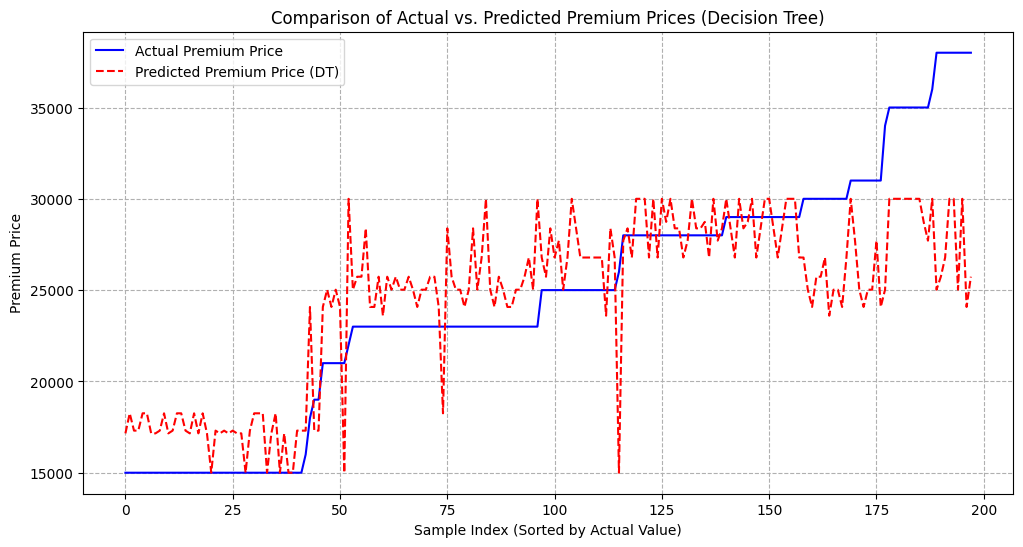

In [ ]:

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted_DT': y_pred_DT_1})
comparison_df = comparison_df.sort_values(by='Actual').reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual Premium Price', color='blue')
plt.plot(comparison_df['Predicted_DT'], label='Predicted Premium Price (DT)', color='red', linestyle='--')
plt.title('Comparison of Actual vs. Predicted Premium Prices (Decision Tree)')
plt.xlabel('Sample Index (Sorted by Actual Value)')
plt.ylabel('Premium Price')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

# DT Ensemble Models

## Model 1 (Bagging)


In [ ]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
762,19,0,0,0,0,146,55,0,0,0,25.802214,18-30,Over_weight
334,31,0,1,0,0,162,87,0,0,0,33.150434,31-45,Obese
890,58,1,0,0,0,147,75,0,0,0,34.707761,46-60,Obese
529,31,0,1,0,0,171,85,0,0,0,29.068773,31-45,Over_weight
468,26,1,1,0,0,167,70,0,1,1,25.099502,18-30,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,0,24.141519,46-60,Normal_weight
270,46,0,1,0,1,166,58,0,0,1,21.048048,46-60,Normal_weight
860,61,1,0,0,0,161,66,0,0,3,25.461981,Above 60,Over_weight
435,37,1,0,0,0,174,63,1,1,1,20.808561,31-45,Normal_weight


In [ ]:
y_train

,PremiumPrice
762,15000
334,34000
890,29000
529,23000
468,15000
...,...
106,25000
270,25000
860,28000
435,31000


In [ ]:
categorical_cols

Index(['AgeBin', 'BMIbin'], dtype='object')

In [ ]:
numeric_cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

preproccesor_rf = ColumnTransformer(transformers = [('cat',TargetEncoder(),categorical_cols)],
                                  remainder='passthrough')

pipeline_rf = Pipeline(steps=[
    ('preprocess', preproccesor_rf),
    ('rf', RandomForestRegressor(random_state=42))
])

hyper_params_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator = pipeline_rf,
                                   param_distributions = hyper_params_rf ,
                                   n_iter =30,
                                   cv=2,
                                   random_state = 42,
                                   verbose =1,
                                   n_jobs=-1,
                                   scoring =scoring,refit ='rmse')

random_search.fit(X_train, y_train)

print("Best parameters found: ",random_search.best_params_)
print("Best cross-validation score achieved: ", random_search.best_score_)


Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found:  {'rf__n_estimators': 50, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_depth': 10}
Best cross-validation score achieved:  -3156.3618450159242


In [ ]:
random_search.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', TargetEncoder(),
                                                  Index(['AgeBin', 'BMIbin'], dtype='object'))])),
                ('rf',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_estimators=50, random_state=42))])

In [ ]:
best_rf_model = random_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

In [ ]:
r2_rf_1 = r2_score(y_test, y_pred_rf )
print(f"R2 Score (rf on Test Data): {r2_rf_1:.4f}")

rmse_r2_1 = np.sqrt(mean_squared_error(y_test, y_pred_rf ))
print(f"RMSE (rf on Test Data): {rmse_r2_1:.2f}")


R2 Score (rf on Test Data): 0.9003
RMSE (rf on Test Data): 2061.44


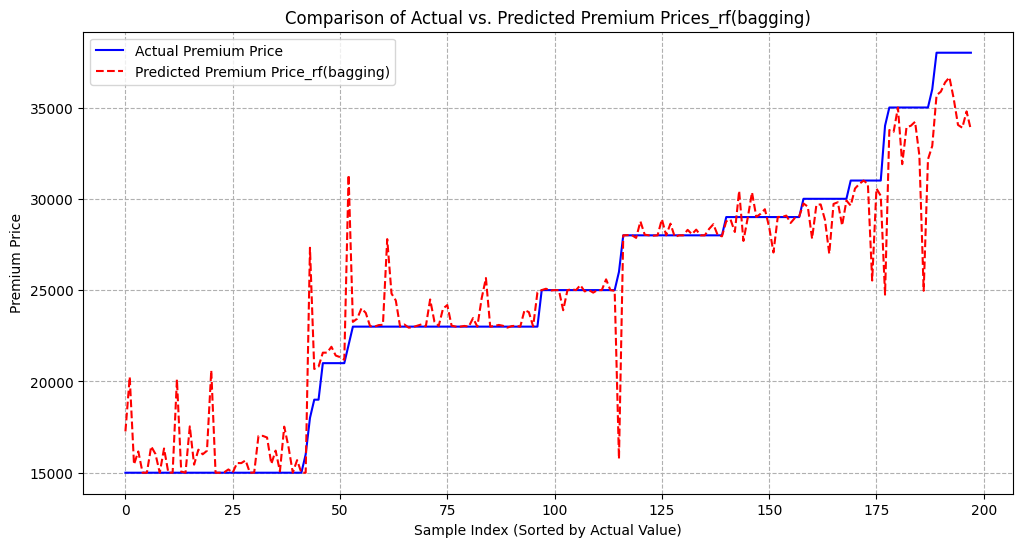

In [ ]:
comparison_df2 = pd.DataFrame({'Actual': y_test, 'Predicted_rf(bagging)': y_pred_rf})
comparison_df2 = comparison_df2.sort_values(by='Actual').reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(comparison_df2['Actual'], label='Actual Premium Price', color='blue')
plt.plot(comparison_df2['Predicted_rf(bagging)'], label='Predicted Premium Price_rf(bagging)', color='red', linestyle='--')
plt.title('Comparison of Actual vs. Predicted Premium Prices_rf(bagging)')
plt.xlabel('Sample Index (Sorted by Actual Value)')
plt.ylabel('Premium Price')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
762,19,0,0,0,0,146,55,0,0,0,25.802214,18-30,Over_weight
334,31,0,1,0,0,162,87,0,0,0,33.150434,31-45,Obese
890,58,1,0,0,0,147,75,0,0,0,34.707761,46-60,Obese
529,31,0,1,0,0,171,85,0,0,0,29.068773,31-45,Over_weight
468,26,1,1,0,0,167,70,0,1,1,25.099502,18-30,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,0,24.141519,46-60,Normal_weight
270,46,0,1,0,1,166,58,0,0,1,21.048048,46-60,Normal_weight
860,61,1,0,0,0,161,66,0,0,3,25.461981,Above 60,Over_weight
435,37,1,0,0,0,174,63,1,1,1,20.808561,31-45,Normal_weight


The most important feature is: remainder__Age with an importance score of: 0.6246


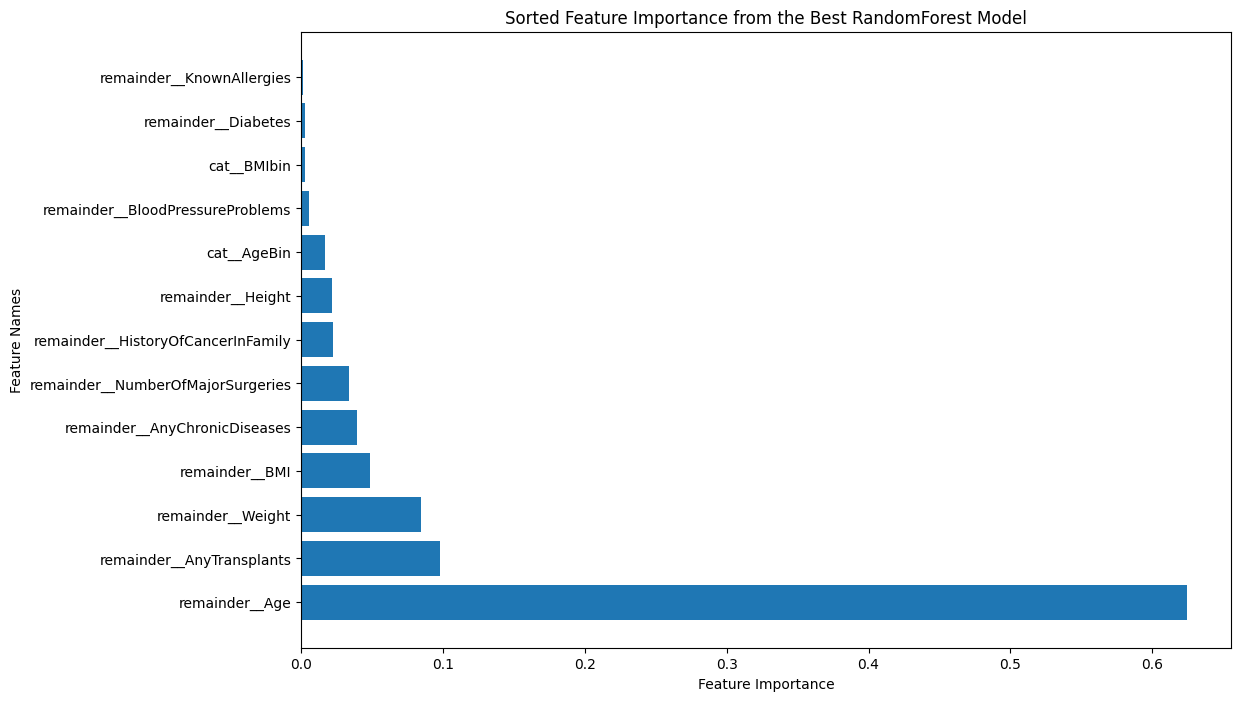

In [ ]:
feature_importances = best_rf_model.named_steps['rf'].feature_importances_
feature_names_for_rf = best_rf_model.named_steps['preprocess'].get_feature_names_out()
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names_for_rf[sorted_indices]

most_important_feature = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature} with an importance score of: {sorted_importances[0]:.4f}")

plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best RandomForest Model')

plt.show()

In [ ]:
results_rf_cv= pd.DataFrame(random_search.cv_results_)
results_rf_cv_1 = results_rf_cv[[
    'params',
    'mean_test_r2', 'rank_test_r2',
    'mean_test_rmse', 'rank_test_rmse',
    'mean_test_mape', 'rank_test_mape'
]]

display(results_rf_cv_1)

,params,mean_test_r2,rank_test_r2,mean_test_rmse,rank_test_rmse,mean_test_mape,rank_test_mape
0,"{'rf__n_estimators': 200, 'rf__min_samples_spl...",0.688208,22,-3437.870262,22,-0.067577,22
1,"{'rf__n_estimators': 100, 'rf__min_samples_spl...",0.727689,16,-3218.883895,16,-0.059887,10
2,"{'rf__n_estimators': 100, 'rf__min_samples_spl...",0.729095,11,-3208.955128,10,-0.059901,12
3,"{'rf__n_estimators': 200, 'rf__min_samples_spl...",0.719670,18,-3266.085803,18,-0.059600,6
4,"{'rf__n_estimators': 200, 'rf__min_samples_spl...",0.729021,12,-3210.677844,12,-0.062050,17
5,"{'rf__n_estimators': 100, 'rf__min_samples_spl...",0.728501,14,-3213.875753,15,-0.060315,14
6,"{'rf__n_estimators': 50, 'rf__min_samples_spli...",0.737796,1,-3156.361845,1,-0.059131,3
7,"{'rf__n_estimators': 50, 'rf__min_samples_spli...",0.688824,21,-3434.133523,21,-0.066622,21
8,"{'rf__n_estimators': 200, 'rf__min_samples_spl...",0.733928,4,-3181.703028,4,-0.059634,9
9,"{'rf__n_estimators': 200, 'rf__min_samples_spl...",0.732795,5,-3188.569279,5,-0.059599,5


## Model 2(Bagging)

In [ ]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
762,19,0,0,0,0,146,55,0,0,0,25.802214,18-30,Over_weight
334,31,0,1,0,0,162,87,0,0,0,33.150434,31-45,Obese
890,58,1,0,0,0,147,75,0,0,0,34.707761,46-60,Obese
529,31,0,1,0,0,171,85,0,0,0,29.068773,31-45,Over_weight
468,26,1,1,0,0,167,70,0,1,1,25.099502,18-30,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,0,24.141519,46-60,Normal_weight
270,46,0,1,0,1,166,58,0,0,1,21.048048,46-60,Normal_weight
860,61,1,0,0,0,161,66,0,0,3,25.461981,Above 60,Over_weight
435,37,1,0,0,0,174,63,1,1,1,20.808561,31-45,Normal_weight


In [ ]:
y_train

,PremiumPrice
762,15000
334,34000
890,29000
529,23000
468,15000
...,...
106,25000
270,25000
860,28000
435,31000


In [ ]:
categorical_cols

Index(['AgeBin', 'BMIbin'], dtype='object')

In [ ]:
numeric_cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI'],
      dtype='object')

In [ ]:
X_train_2 = X_train.copy()

In [ ]:
y_train_2 = y_train.copy()

In [ ]:
X_train_2.drop(columns =['Height','Weight'],inplace = True)

In [ ]:
X_train_2

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
762,19,0,0,0,0,0,0,0,25.802214,18-30,Over_weight
334,31,0,1,0,0,0,0,0,33.150434,31-45,Obese
890,58,1,0,0,0,0,0,0,34.707761,46-60,Obese
529,31,0,1,0,0,0,0,0,29.068773,31-45,Over_weight
468,26,1,1,0,0,0,1,1,25.099502,18-30,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,0,0,0,24.141519,46-60,Normal_weight
270,46,0,1,0,1,0,0,1,21.048048,46-60,Normal_weight
860,61,1,0,0,0,0,0,3,25.461981,Above 60,Over_weight
435,37,1,0,0,0,1,1,1,20.808561,31-45,Normal_weight


In [ ]:
y_train_2

,PremiumPrice
762,15000
334,34000
890,29000
529,23000
468,15000
...,...
106,25000
270,25000
860,28000
435,31000


In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

preproccesor_rf_2 = ColumnTransformer(transformers = [('cat',TargetEncoder(),categorical_cols)],
                                  remainder='passthrough')

pipeline_rf_2 = Pipeline(steps=[
    ('preprocess', preproccesor_rf_2),
    ('rf', RandomForestRegressor(random_state=42))
])

hyper_params_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

random_search_2 = RandomizedSearchCV(estimator = pipeline_rf_2,
                                   param_distributions = hyper_params_rf ,
                                   n_iter =30,
                                   cv=2,
                                   random_state = 42,
                                   verbose =1,
                                   n_jobs=-1,
                                   scoring =scoring,refit ='rmse')

random_search_2.fit(X_train_2, y_train_2)

print("Best parameters found: ",random_search_2.best_params_)
print("Best cross-validation score achieved: ", random_search_2.best_score_)


Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found:  {'rf__n_estimators': 200, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_depth': 20}
Best cross-validation score achieved:  -3385.742760695196


In [246]:
random_search_2.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', TargetEncoder(),
                                                  Index(['AgeBin', 'BMIbin'], dtype='object'))])),
                ('rf',
                 RandomForestRegressor(max_depth=20, min_samples_split=10,
                                       n_estimators=200, random_state=42))])

In [ ]:
X_test

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,AgeBin,BMIbin
613,50,0,0,0,0,165,84,1,1,1,30.853994,46-60,Obese
451,39,0,0,0,1,185,73,1,1,1,21.329438,31-45,Normal_weight
731,65,1,1,0,0,165,87,0,0,0,31.955923,Above 60,Obese
436,29,0,0,0,0,179,70,0,1,1,21.847009,18-30,Normal_weight
275,48,1,1,0,0,171,84,1,0,0,28.726788,46-60,Over_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,49,1,0,0,0,160,110,1,1,1,42.968750,46-60,Obese
506,54,0,0,0,0,184,81,0,0,1,23.924858,46-60,Normal_weight
49,20,0,0,0,0,160,83,0,0,0,32.421875,18-30,Obese
717,50,1,1,0,0,175,89,0,0,2,29.061224,46-60,Over_weight


In [ ]:
X_test_2 = X_test.copy()

In [ ]:
X_test_2.drop(columns =['Height','Weight'],inplace = True)

In [247]:
best_rf_model_2 = random_search_2.best_estimator_

y_pred_rf_2 = best_rf_model_2.predict(X_test_2)

In [248]:
r2_rf_2 = r2_score(y_test, y_pred_rf_2)
print(f"R2 Score (rf on Test Data): {r2_rf_2:.4f}")

rmse_r2_2 = np.sqrt(mean_squared_error(y_test, y_pred_rf_2 ))
print(f"RMSE (rf on Test Data): {rmse_r2_2:.2f}")

R2 Score (rf on Test Data): 0.8682
RMSE (rf on Test Data): 2370.87


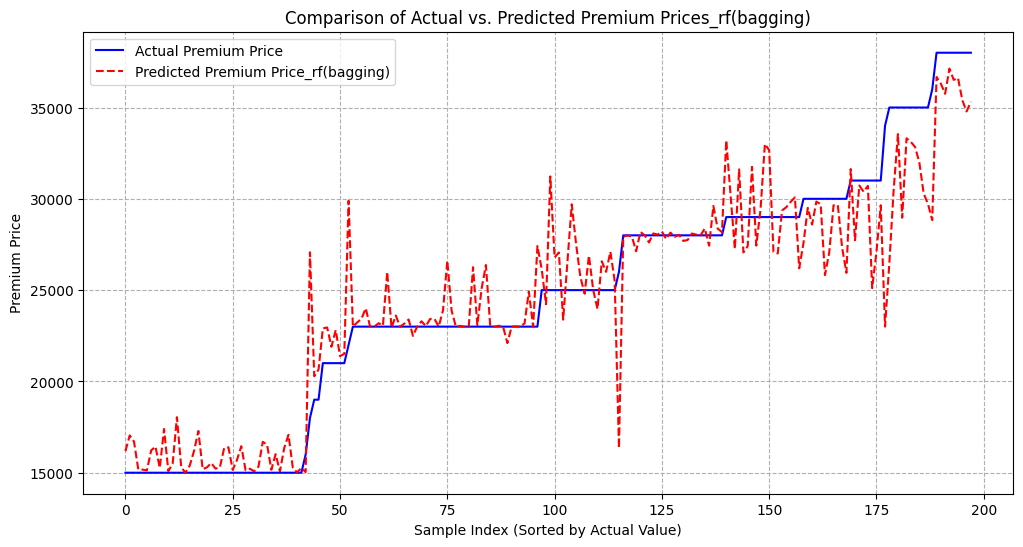

In [249]:
comparison_df2_2 = pd.DataFrame({'Actual': y_test, 'Predicted_rf(bagging)': y_pred_rf_2})
comparison_df2_2 = comparison_df2_2.sort_values(by='Actual').reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(comparison_df2_2['Actual'], label='Actual Premium Price', color='blue')
plt.plot(comparison_df2_2['Predicted_rf(bagging)'], label='Predicted Premium Price_rf(bagging)', color='red', linestyle='--')
plt.title('Comparison of Actual vs. Predicted Premium Prices_rf(bagging)')
plt.xlabel('Sample Index (Sorted by Actual Value)')
plt.ylabel('Premium Price')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

The most important feature is: remainder__Age with an importance score of: 0.6692


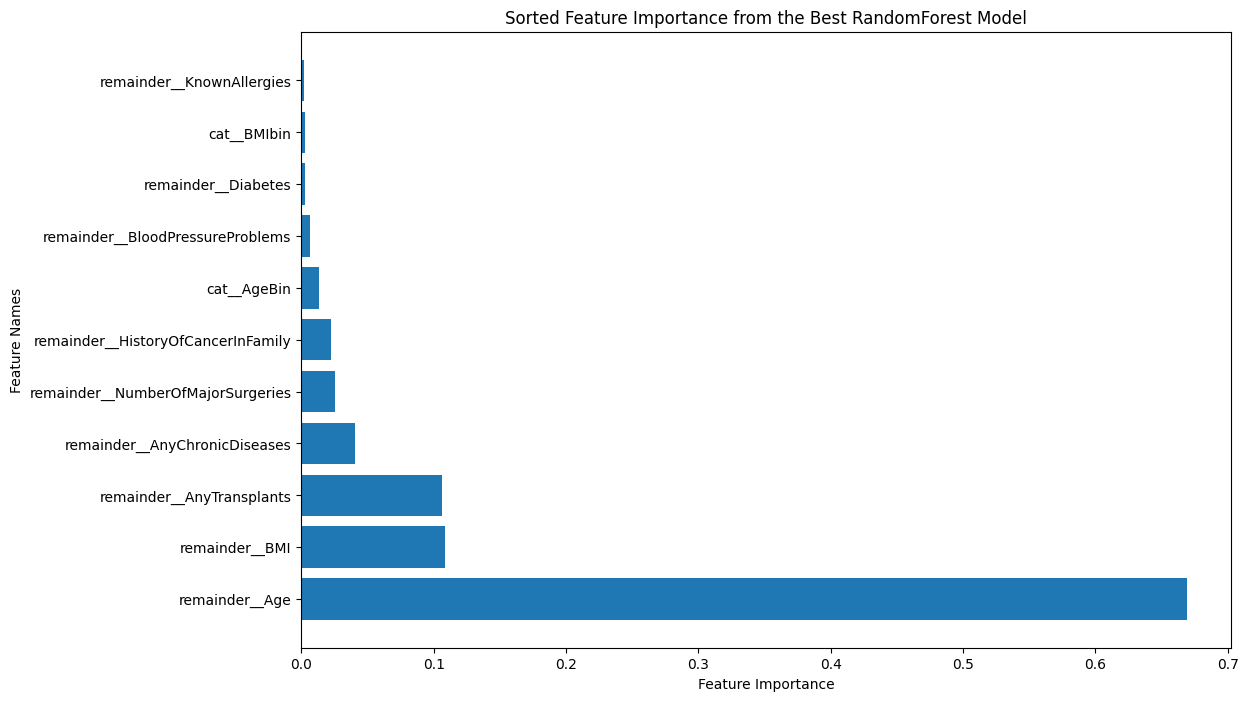

In [250]:
feature_importances = best_rf_model_2.named_steps['rf'].feature_importances_
feature_names_for_rf = best_rf_model_2.named_steps['preprocess'].get_feature_names_out()
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names_for_rf[sorted_indices]

most_important_feature = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature} with an importance score of: {sorted_importances[0]:.4f}")

plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best RandomForest Model')

plt.show()

## Model 3(Bagging)


In [ ]:
# After removing column of AgeBin,BMIbin,BMI

In [255]:
X_train_3 = X_train.copy()

In [260]:
y_train_3 = y_train.copy()

In [258]:
X_train_3.drop(columns =['BMI','AgeBin','BMIbin'],inplace = True)

In [265]:
X_train_3.dtypes

,0
Age,int64
Diabetes,int64
BloodPressureProblems,int64
AnyTransplants,int64
AnyChronicDiseases,int64
Height,int64
Weight,int64
KnownAllergies,int64
HistoryOfCancerInFamily,int64
NumberOfMajorSurgeries,int64


In [266]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

preproccesor_rf_3 = ColumnTransformer(transformers = [],
                                  remainder='passthrough')

pipeline_rf_3 = Pipeline(steps=[
    ('preprocess', preproccesor_rf_3),
    ('rf', RandomForestRegressor(random_state=42))
])

hyper_params_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

random_search_3 = RandomizedSearchCV(estimator = pipeline_rf_3,
                                   param_distributions = hyper_params_rf ,
                                   n_iter =30,
                                   cv=2,
                                   random_state = 42,
                                   verbose =1,
                                   n_jobs=-1,
                                   scoring =scoring,refit ='rmse')

random_search_3.fit(X_train_3, y_train_3)

print("Best parameters found: ",random_search_3.best_params_)
print("Best cross-validation score achieved: ", random_search_3.best_score_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found:  {'rf__n_estimators': 50, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_depth': 10}
Best cross-validation score achieved:  -3157.7040014616014


In [267]:
random_search_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough', transformers=[])),
                ('rf',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       n_estimators=50, random_state=42))])

In [268]:
X_test_3 = X_test.copy()

In [269]:
X_test_3.drop(columns =['BMI','AgeBin','BMIbin'],inplace = True)

In [270]:
best_rf_model_3 = random_search_3.best_estimator_

y_pred_rf_3 = best_rf_model_3.predict(X_test_3)

In [271]:
r2_rf_3 = r2_score(y_test, y_pred_rf_3)
print(f"R2 Score (rf on Test Data): {r2_rf_3:.4f}")

rmse_r2_3 = np.sqrt(mean_squared_error(y_test, y_pred_rf_3 ))
print(f"RMSE (rf on Test Data): {rmse_r2_3:.2f}")

R2 Score (rf on Test Data): 0.8858
RMSE (rf on Test Data): 2206.69


## Model -4 (Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce

preprocessor_gb = ColumnTransformer(transformers = [
    ('cat', ce.TargetEncoder(), categorical_cols)
], remainder='passthrough')


pipeline_gb = Pipeline(steps=[
    ('preprocess', preprocessor_gb),
    ('gb', GradientBoostingRegressor(random_state=42))
])

hyper_params_gb = {
    'gb__n_estimators': [10,50, 100, 200],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2,.5,.7],
    'gb__max_depth': [3, 5, 7, 10],
    'gb__subsample': [0.7, 0.8, 0.9, 1.0],
    "gb__max_leaf_nodes" : [20, 40, 80,90],
    "gb__learning_rate": [0.1, 0.2, 0.3,.5,.7]
}

print("GradientBoostingRegressor pipeline and hyperparameter space defined.")

GradientBoostingRegressor pipeline and hyperparameter space defined.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


random_search_gb = RandomizedSearchCV(estimator=pipeline_gb,
                                    param_distributions=hyper_params_gb,
                                    n_iter=40,
                                    cv=2,
                                    random_state=42,
                                    verbose=1,
                                    n_jobs=-1,
                                    scoring=scoring,
                                    refit='rmse')


random_search_gb.fit(X_train, y_train)
print("Best parameters found:", random_search_gb.best_params_)
print("Best cross-validation RMSE achieved:", random_search_gb.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
Best parameters found: {'gb__subsample': 0.9, 'gb__n_estimators': 50, 'gb__max_leaf_nodes': 20, 'gb__max_depth': 10, 'gb__learning_rate': 0.1}
Best cross-validation RMSE achieved: -3420.4707696973337


R2 Score (Gradient Boosting on Test Data): 0.8631
RMSE (Gradient Boosting on Test Data): 2416.32


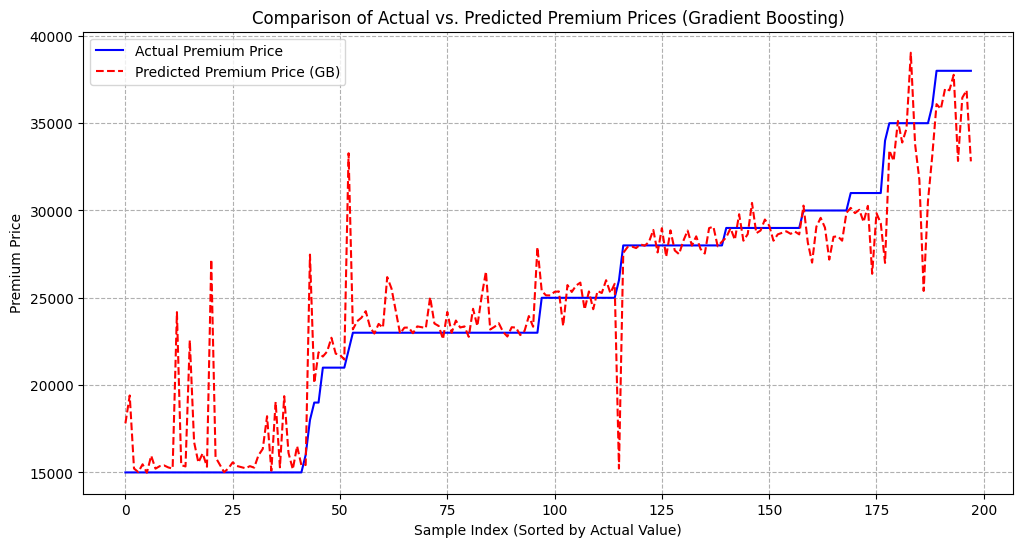

In [ ]:
best_gb_model = random_search_gb.best_estimator_

y_pred_gb = best_gb_model.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
print(f"R2 Score (Gradient Boosting on Test Data): {r2_gb:.4f}")

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"RMSE (Gradient Boosting on Test Data): {rmse_gb:.2f}")

comparison_df_gb = pd.DataFrame({'Actual': y_test, 'Predicted_GB': y_pred_gb})
comparison_df_gb = comparison_df_gb.sort_values(by='Actual').reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(comparison_df_gb['Actual'], label='Actual Premium Price', color='blue')
plt.plot(comparison_df_gb['Predicted_GB'], label='Predicted Premium Price (GB)', color='red', linestyle='--')
plt.title('Comparison of Actual vs. Predicted Premium Prices (Gradient Boosting)')
plt.xlabel('Sample Index (Sorted by Actual Value)')
plt.ylabel('Premium Price')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

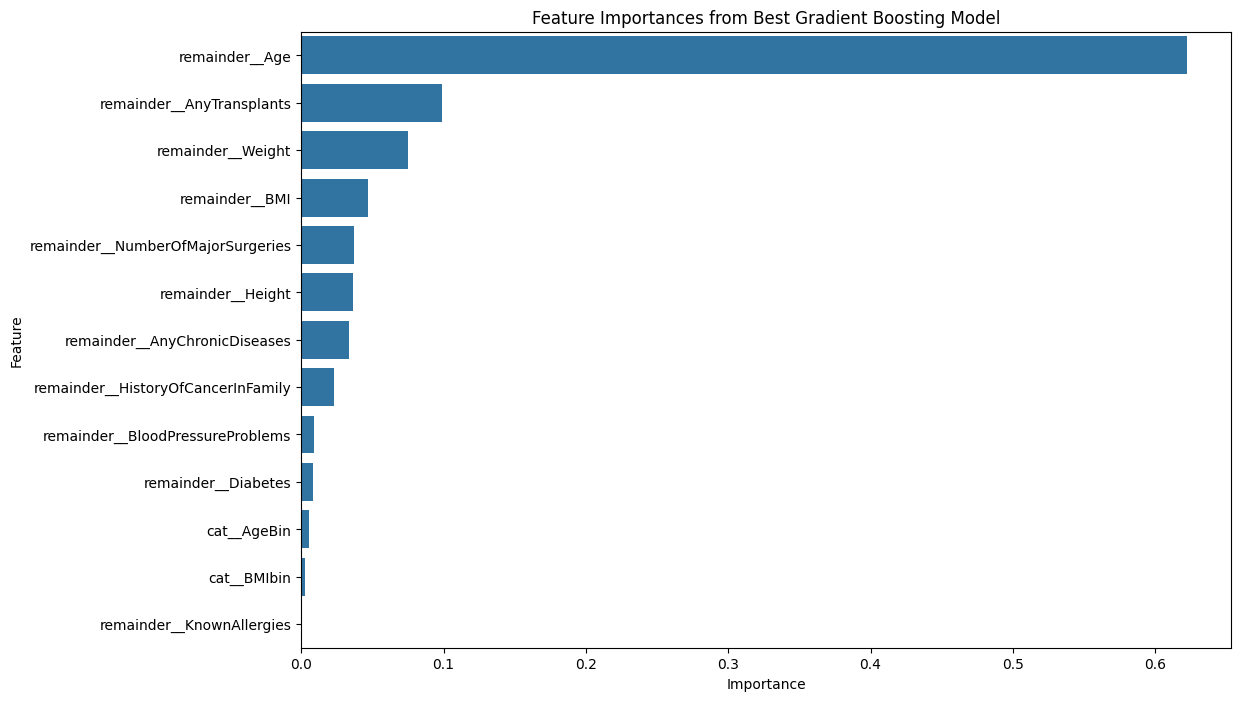

Feature importances extracted and plotted for the Gradient Boosting model.


In [ ]:
feature_importances_gb = best_gb_model.named_steps['gb'].feature_importances_
feature_names_gb = best_gb_model.named_steps['preprocess'].get_feature_names_out()

importances_df_gb = pd.DataFrame({
    'Feature': feature_names_gb,
    'Importance': feature_importances_gb
})

importances_df_gb = importances_df_gb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_gb,)
plt.title('Feature Importances from Best Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("Feature importances extracted and plotted for the Gradient Boosting model.")

## Result comparison

In [272]:
rmse_linear_lasso = -model_1.best_score_
r2_linear_lasso = results_1[results_1['rank_test_rmse'] == 1]['mean_test_r2'].values[0]

metrics = {
    'Linear/Lasso': {
        'RMSE': rmse_linear_lasso,
        'R2': r2_linear_lasso
    },
    'KNN_TargetEncoder_Euclidean': {
        'RMSE': rmse_knn_2,
        'R2': r2_knn_2
    },
    'KNN_OHE_Cosine_L2Norm': {
        'RMSE': rmse_knn_3,
        'R2': r2_knn_3
    },
    'Decision_Tree': {
        'RMSE': rmse_DT_1,
        'R2': r2_DT_1
    },
    'Random_Forest(Bagging)': {
        'RMSE': rmse_r2_1,
        'R2': r2_rf_1
    },
    'Random_Forest(Bagging_2)': {
        'RMSE': rmse_r2_2,
        'R2': r2_rf_2
    },
    'Random_Forest(Bagging_3)': {
        'RMSE': rmse_r2_3,
        'R2': r2_rf_3
    },
    'Gradient_Boosting': {
        'RMSE': rmse_gb,
        'R2': r2_gb
    }
}

performance_df = pd.DataFrame(metrics).T
display(performance_df)

,RMSE,R2
Linear/Lasso,3653.519234,0.640403
KNN_TargetEncoder_Euclidean,3260.741552,0.750663
KNN_OHE_Cosine_L2Norm,3916.918512,0.640215
Decision_Tree,4004.068746,0.624026
Random_Forest(Bagging),2061.435985,0.900346
Random_Forest(Bagging_2),2370.869684,0.868184
Random_Forest(Bagging_3),2206.691203,0.885808
Gradient_Boosting,2416.322774,0.863081


## Comparative Analysis and Conclusion

### Key Observations:

*   **Random Forest** achieved the best performance among all models, with the lowest RMSE of **2061.44** and the highest R2 score of **0.9003**. This indicates that the ensemble method of bagging (Random Forest) was highly effective in capturing the underlying patterns in the data and providing accurate predictions.
*   **Gradient Boosting** performed very competitively, coming in second with an RMSE of 2233.63 and an R2 score of 0.8830. This further emphasizes the strength of tree-based ensemble methods for this dataset.
*   The **Linear/Lasso** model provided a decent baseline, achieving an RMSE of 3099.75 and an R2 of 0.7747. This suggests that while linear relationships exist, the dataset likely benefits from more complex non-linear models.
*   The **K-Nearest Neighbors (KNN)** models showed varying performance. The KNN with Target Encoding and Euclidean metric performed better (RMSE 3260.74, R2 0.7507) than the KNN with One-Hot Encoding, L2 Normalization, and Cosine metric (RMSE 3916.92, R2 0.6402). This highlights the importance of encoding strategies and distance metrics in KNN.
*   The **Decision Tree** model, as a single tree, had the lowest performance with an RMSE of 4004.07 and an R2 of 0.6240, which is expected as ensemble methods typically outperform individual trees by reducing variance and bias.

### Overall Conclusion:

For predicting insurance premiums in this dataset, **ensemble tree-based models, particularly Random Forest, are the most effective.** The Random Forest model demonstrated superior predictive power, achieving the highest R2 score and lowest RMSE on unseen test data. While linear models provide a reasonable starting point, the complexity of the relationships between health factors and premium prices is better captured by non-linear and ensemble approaches.

Text(0.5, 1.0, 'Permutation Importance for Insurance Premium Prediction')

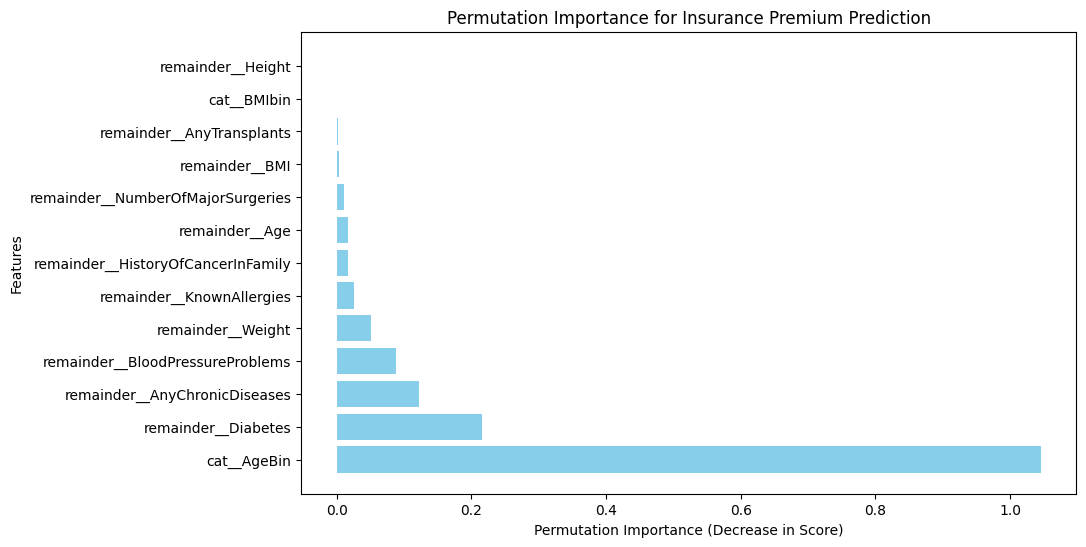

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(
    best_rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
perm_df = pd.DataFrame({
    'Feature': best_rf_model.named_steps['preprocess'].get_feature_names_out(),
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(perm_df['Feature'], perm_df['Importance'], color='skyblue')
plt.xlabel("Permutation Importance (Decrease in Score)")
plt.ylabel("Features")
plt.title("Permutation Importance for Insurance Premium Prediction")



#  What Drives Insurance Premiums?

Using **Permutation Importance** on our Random Forest model, we identified the strongest drivers of premium costs:

- **Age dominates:** Age categories (`cat__AgeBin`) are the most powerful predictor of premiums.  
- **Health conditions matter:** Diabetes, chronic diseases, and blood pressure problems consistently raise premiums, often through complex interactions.  
- **Weight > Height/BMI:** Weight carries unique predictive power, while height and BMI add little once age and health conditions are considered.  
- **Transplants less critical (Permutation view):** Although “AnyTransplants” looked important in the model’s built‑in Gini importance, it barely registers in permutation importance.

---

##  Why the difference for “AnyTransplants”?

- **Gini Importance (model‑based):** Measures how often and how effectively a feature helps split the training data. “AnyTransplants” may create strong splits in certain branches, so it looks important.  
- **Permutation Importance (prediction‑based):** Measures how much test accuracy drops when the feature is scrambled. If other features (like age or chronic diseases) already capture most of the transplant risk, shuffling “AnyTransplants” doesn’t hurt performance much.  
- **Conclusion:** “AnyTransplants” is *useful for tree construction* but not *critical for overall predictive accuracy*. The model leans more on broader signals like age and chronic disease.

---

##  Final Takeaway

Premiums are primarily driven by **age and core health conditions**, with weight adding unique value.  
Features like BMI and transplant history play smaller roles once these dominant drivers are accounted for.  
This distinction between Gini and permutation importance shows why interpretability methods matter: they reveal not just what the model uses, but what it truly relies on for accurate predictions.


# Saving the model to pickle file for quick deployment

In [275]:
# making pickle file for streamlit app deployment for
import pickle
pickle_out = open("Insurance.pkl",mode ='wb')
pickle.dump(random_search_3,pickle_out)
pickle_out.close()